# <center>California Housing Prediction</center>

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

#import pc_key
#api_key = pc_key.key

#cities_df = pd.read_csv('cities_lat_long.csv')

### Variables to request

In [2]:
data_cols = {
'DP04_0089E':'med_house_value',
'DP05_0086E':'tot_housing_units',
'DP04_0069PE':'tot_housing_units_w/_SolarEnergy',
'DP03_0062E':'med_household_income',
'DP03_0055PE':'tot_household_income(25k-34k)',
'DP03_0056PE':'tot_household_income(35k-49k)',
'DP03_0057PE':'tot_household_income(50k-74k)',
'DP03_0058PE':'tot_household_income(75k-99k)',
'DP03_0059PE':'tot_household_income(100k-149k)',
'DP03_0060PE':'tot_household_income(150k-199k)',
'DP03_0061PE':'tot_household_income(200k-more)',

'DP05_0001E':'tot_pop',

'DP05_0002PE':'tot_male_pop',
'DP05_0003PE':'tot_female_pop',

'DP05_0006PE':'tot_pop_ages(5-9yrs)',
'DP05_0007PE':'tot_pop_ages(10-14yrs)',
'DP05_0008PE':'tot_pop_ages(15-19yrs)',
'DP05_0009PE':'tot_pop_ages(20-24yrs)',
'DP05_0010PE':'tot_pop_ages(25-34yrs)',
'DP05_0018E':'Median_Age(yrs)',

'DP05_0037PE':'tot_white_pop',
'DP05_0038PE':'tot_african_American_pop',
'DP05_0044PE':'tot_asian_pop',

'DP05_0045PE':'tot_indian_pop',
'DP05_0046PE':'tot_chinese_pop',
'DP05_0047PE':'tot_filipino_pop',
'DP05_0048PE':'tot_japanese_pop',
'DP05_0049PE':'tot_korean_pop',
'DP05_0050PE':'tot_vietnamese_pop',
}

## percentages
data_cols_p = {
'DP04_0089E':'med_house_value',
'DP05_0086E':'tot_housing_units',
'DP04_0069PE':'tot_housing_units_w/_SolarEnergy',
'DP03_0062E':'med_household_income',
'DP03_0055PE':'tot_household_income(25k-34k)',
'DP03_0056PE':'tot_household_income(35k-49k)',
'DP03_0057PE':'tot_household_income(50k-74k)',
'DP03_0058PE':'tot_household_income(75k-99k)',
'DP03_0059PE':'tot_household_income(100k-149k)',
'DP03_0060PE':'tot_household_income(150k-199k)',
'DP03_0061PE':'tot_household_income(200k-more)',

'DP05_0001E':'tot_pop',

'DP05_0002PE':'tot_male_pop',
'DP05_0003PE':'tot_female_pop',

'DP05_0006PE':'tot_pop_ages(5-9yrs)',
'DP05_0007PE':'tot_pop_ages(10-14yrs)',
'DP05_0008PE':'tot_pop_ages(15-19yrs)',
'DP05_0009PE':'tot_pop_ages(20-24yrs)',
'DP05_0010PE':'tot_pop_ages(25-34yrs)',
'DP05_0018PE':'Median_Age(yrs)',

'DP05_0037PE':'tot_white_pop',
'DP05_0038PE':'tot_african_American_pop',
'DP05_0044PE':'tot_asian_pop',

'DP05_0045PE':'tot_indian_pop',
'DP05_0046PE':'tot_chinese_pop',
'DP05_0047PE':'tot_filipino_pop',
'DP05_0048PE':'tot_japanese_pop',
'DP05_0049PE':'tot_korean_pop',
'DP05_0050PE':'tot_vietnamese_pop',
}

### Use estimate counts (data_cols) or estimate percentages (data_cols_p)

In [3]:
# estimate counts
data_keys = list(data_cols.keys())
data_values = list(data_cols.values())
values = ','.join(data_keys)

# estimate percentages
#data_keys = list(data_cols_p.keys())
#data_values = list(data_cols_p.values())
#values = ','.join(data_keys)

### Use 1 Year data or 5 Year data

In [4]:
# Census.gov 2017 (1 year) data
# every congressional district, every metropolitan area, and all counties and places with populations of 65,000 
# 143 block groups
# pros: more accurate
# cons: less cities
#df_1yr = pd.read_json('https://api.census.gov/data/2017/acs/acs1/profile?get='+values+',NAME&for=place:*&in=state:06')


# Census.gov 2013-2017 (5 year) data
# Unlike the 1-year estimates, geographies do not have to meet a particular 
# population threshold in order to be published
# 1523 block groups
# pros: more cities
# cons: not as accurate
df_5yr = pd.read_json('https://api.census.gov/data/2017/acs/acs5/profile?get='+values+',NAME&for=place:*&in=state:06')


In [5]:
## Using 5 year data
#df = df_1yr
df = df_5yr

## Correct Column names
- Update Column names to readable values
- Drop State and place-code columns
- remove the extra ' city' string after every city (doesn't remove city if the name contains city ex)Culver City)
- changes column 'NAME' to 'city'


In [6]:
df.columns = df.iloc[0]
df.rename(columns = data_cols,inplace=True)
df.drop(['state','place'],axis=1,inplace=True)
df.drop(0,axis=0,inplace=True)
df.reset_index(inplace=True)
df['NAME'] = df['NAME'].str.split(', California').apply(lambda x: x[0]).str.split(' city').apply(lambda x: x[0]).str.split(' CDP').apply(lambda x: x[0])
df = df.set_index('NAME').drop('index',axis=1).reset_index()
df.rename(columns={'NAME':'city'}, inplace=True)
df['city'] = df.city.str.lower()


### Change Column Data Types to floats or ints instead of strings

In [7]:
df_columns = list(df.columns)

for index, col in enumerate(df_columns):
    if(index == 0):
        continue
    if(index in [2,12]):
        df[col] = df[col].astype(int)
    else:
        df[col] = df[col].astype(float)
 

In [8]:
df.dtypes
#df.loc[(df['tot_asian_pop'] < 0) & (df['tot_pop'] > 10000) , :]
#df.loc[df['tot_female_pop'] == 100, :]

0
city                                 object
med_house_value                     float64
tot_housing_units                     int64
tot_housing_units_w/_SolarEnergy    float64
med_household_income                float64
tot_household_income(25k-34k)       float64
tot_household_income(35k-49k)       float64
tot_household_income(50k-74k)       float64
tot_household_income(75k-99k)       float64
tot_household_income(100k-149k)     float64
tot_household_income(150k-199k)     float64
tot_household_income(200k-more)     float64
tot_pop                               int64
tot_male_pop                        float64
tot_female_pop                      float64
tot_pop_ages(5-9yrs)                float64
tot_pop_ages(10-14yrs)              float64
tot_pop_ages(15-19yrs)              float64
tot_pop_ages(20-24yrs)              float64
tot_pop_ages(25-34yrs)              float64
Median_Age(yrs)                     float64
tot_white_pop                       float64
tot_african_American_pop      

### Drop Rows with erroneous data
Some info couldn't be captured because of such low population, so they were give a value of '-6.66667e+08'

In [9]:
# drop rows w/ negative med_house_vaue
drop_rows = list(df[df['med_house_value'] < 0].index)
df.drop(drop_rows, axis=0,inplace=True)

# drop rows w/ negative med_household_income
drop_rows = list(df[df['med_household_income'] < 0].index)
df.drop(drop_rows, axis=0, inplace=True)

#df.shape

In [10]:
df.shape

(1281, 30)

## Check for duplicates

In [11]:
# duplicates of city name [first]
df.loc[df.city.duplicated(keep='first'),:]

0              city  med_house_value  tot_housing_units  \
767   mountain view         355000.0                923   
829   spring valley         164200.0                486   
930         bayview         200000.0               1086   
936    green valley         675100.0                708   
1009       live oak         622600.0               6773   
1116     el cerrito         400000.0               1525   
1186        burbank         646000.0              43323   
1293  rolling hills         350700.0                289   
1338     san miguel         294700.0                837   
1399    el sobrante         402300.0               5205   
1457     greenfield         141500.0               1013   

0     tot_housing_units_w/_SolarEnergy  med_household_income  \
767                                0.0               68828.0   
829                                0.0               32500.0   
930                                0.0               40034.0   
936                                0.0               88269.0   
1009                               1.3               72630.0   
1116                               1.3               64135.0   
1186                               0.1               69118.0   
1293                               0.0              113750.0   
1338                               0.0               53750.0   
1399                               0.9               74478.0   
1457                               0.0               49460.0   

0     tot_household_income(25k-34k)  tot_household_income(35k-49k)  \
767                             4.9                            9.3   
829                            18.7                            6.2   
930                            11.1                           20.9   
936                             3.8                           13.1   
1009                            7.7                            9.5   
1116                            9.9                           15.4   
1186                            7.0                           10.8   
1293                            8.7                            5.5   
1338                            7.1                           14.7   
1399                           10.0                            8.9   
1457                           10.9                           13.9   

0     tot_household_income(50k-74k)  tot_household_income(75k-99k)  \
767                            26.8                           10.8   
829                            14.0                           15.9   
930                            15.2                           10.1   
936                            28.1                            6.0   
1009                           17.4                           13.0   
1116                           21.7                           12.6   
1186                           16.6                           12.9   
1293                           16.3                            7.6   
1338                           23.0                           20.7   
1399                           18.2                           17.6   
1457                           21.2                            8.8   

0     tot_household_income(100k-149k)  ...  Median_Age(yrs)  tot_white_pop  \
767                              15.0  ...             35.4           69.8   
829                               5.7  ...             51.1           86.6   
930                               4.0  ...             42.6           79.0   
936                              15.2  ...             63.3           91.9   
1009                             18.0  ...             39.0           81.1   
1116                             22.2  ...             38.2           70.0   
1186                             15.6  ...             39.5           70.7   
1293                             31.1  ...             58.2           91.4   
1338                              4.9  ...             30.3           77.1   
1399                             16.5  ...             40.6 

In [12]:
# duplicates of city name [last]
df.loc[df.city.duplicated(keep='last'),:]

0              city  med_house_value  tot_housing_units  \
57       greenfield         260200.0               3874   
416        live oak         165000.0               2496   
490   mountain view        1079900.0              35256   
501         bayview         362400.0                569   
647      san miguel        1034400.0               1180   
666   spring valley         407200.0              10341   
749      el cerrito         682300.0              10455   
822   rolling hills        2000001.0                704   
859    green valley         253300.0                516   
1109        burbank         574300.0               1991   
1305    el sobrante         467300.0               3999   

0     tot_housing_units_w/_SolarEnergy  med_household_income  \
57                                 0.1               50553.0   
416                                1.6               50492.0   
490                                0.0              120351.0   
501                                0.0               83958.0   
647                                1.3              163971.0   
666                                0.9               62734.0   
749                                0.4               96914.0   
822                                1.8              206932.0   
859                                0.0               80938.0   
1109                               0.0               74299.0   
1305                               0.0              113375.0   

0     tot_household_income(25k-34k)  tot_household_income(35k-49k)  \
57                             11.6                           20.5   
416                            12.1                           11.7   
490                             4.2                            5.9   
501                             2.8                            9.8   
647                             2.3                            2.1   
666                             8.2                           11.7   
749                             6.0                            9.1   
822                             4.1                            7.2   
859                             4.5                           12.3   
1109                            6.2                           12.9   
1305                            2.3                            2.2   

0     tot_household_income(50k-74k)  tot_household_income(75k-99k)  \
57                             21.7                           15.8   
416                            18.2                           16.2   
490                            11.4                            8.6   
501                            17.6                           23.0   
647                             7.3                            8.6   
666                            22.2                           13.7   
749                            13.0                           11.5   
822                             5.4                            6.8   
859                            21.4                           22.0   
1109                           12.5                           16.1   
1305                           16.2                            8.0   

0     tot_household_income(100k-149k)  ...  Median_Age(yrs)  tot_white_pop  \
57                                8.2  ...             26.9           67.2   
416                               9.8  ...             32.3           76.5   
490                              19.2  ...             35.0           56.7   
501                              19.5  ...             41.8           69.2   
647                              21.0  ...             43.2           85.8   
666                              18.6  ...             35.3           65.2   
749                              20.8  ...             42.7           53.1   
822                               8.6  ...             55.0           76.8   
859                              18.0  ...             48.6           93.2   
1109                             15.0  ...             37.6 

In [13]:
# compared prices to zillow's median housing price and selected cities further away from said value
del_rows = [1457,1399,647,1338,1293,1109,1116,416,936,859,930,829,767]
df.drop(del_rows,axis=0, inplace=True)
df.count()

0
city                                1268
med_house_value                     1268
tot_housing_units                   1268
tot_housing_units_w/_SolarEnergy    1268
med_household_income                1268
tot_household_income(25k-34k)       1268
tot_household_income(35k-49k)       1268
tot_household_income(50k-74k)       1268
tot_household_income(75k-99k)       1268
tot_household_income(100k-149k)     1268
tot_household_income(150k-199k)     1268
tot_household_income(200k-more)     1268
tot_pop                             1268
tot_male_pop                        1268
tot_female_pop                      1268
tot_pop_ages(5-9yrs)                1268
tot_pop_ages(10-14yrs)              1268
tot_pop_ages(15-19yrs)              1268
tot_pop_ages(20-24yrs)              1268
tot_pop_ages(25-34yrs)              1268
Median_Age(yrs)                     1268
tot_white_pop                       1268
tot_african_American_pop            1268
tot_asian_pop                       1268
tot_indian_pop

### Grab data set with latitude and longitude coordinates for a few cities

In [14]:
df_coords = pd.read_csv('cities_lat_long.csv')
df_coords.rename(columns={'Name':'city'}, inplace=True)
df_coords['city'] = df_coords['city'].str.lower()
df_coords.count()

city         459
Latitude     459
Longitude    459
dtype: int64

### Sort values by city name

In [15]:
df.sort_values('city', inplace=True)
df_coords.sort_values('city', inplace=True)

### Merge Latitude and Longitude Coordinates to Cities that are Intersecting
df_with_coords contains only 459 cities with coords

In [16]:
df_with_coords = pd.merge(df, df_coords, on='city',how='right')
df_with_coords.drop(list(df[df.med_house_value.isnull()].index),axis=0, inplace=True)
df_with_coords.rename(columns={'Latitude': 'latitude', 'Longitude': 'longitude'}, inplace=True)
df_with_coords.dropna(how='any',inplace=True)
df_with_coords.reset_index(inplace=True)
df_with_coords.drop('index',axis=1,inplace=True)
df_with_coords.shape

(457, 32)

### Drop any row with NAN value

In [17]:
# drop rows w/ tot_pop < 5000 and drop NA rows
df_without_coords = df.loc[df['tot_pop'] > 2000].copy()
df_without_coords.dropna(how='any', inplace=True)
df_without_coords.reset_index(inplace=True)
df_without_coords.drop('index',axis=1,inplace=True)
df_without_coords.shape

(867, 30)

## <center>Visualize the Data (Data with coordinates)</center>

In [18]:
df_with_coords.describe()

med_house_value  tot_housing_units  tot_housing_units_w/_SolarEnergy  \
count     4.570000e+02       4.570000e+02                        457.000000   
mean      5.006125e+05       2.475360e+04                          0.407659   
std       3.837818e+05       7.860397e+04                          0.579782   
min       6.310000e+04       3.000000e+01                          0.000000   
25%       2.458000e+05       4.358000e+03                          0.100000   
50%       3.939000e+05       1.169500e+04                          0.300000   
75%       6.334000e+05       2.576500e+04                          0.500000   
max       2.000001e+06       1.457762e+06                          6.700000   

       med_household_income  tot_household_income(25k-34k)  \
count            457.000000                     457.000000   
mean           71583.669584                       9.013348   
std            33540.903471                       4.029945   
min            22802.000000                       1.600000   
25%            48117.000000                       6.000000   
50%            63286.000000                       8.400000   
75%            87532.000000                      11.300000   
max           250001.000000                      25.400000   

       tot_household_income(35k-49k)  tot_household_income(50k-74k)  \
count                     457.000000                     457.000000   
mean                       11.769803                      16.466958   
std                         4.098150                       3.871208   
min                         2.700000                       5.400000   
25%                         8.600000                      14.100000   
50%                        11.700000                      16.800000   
75%                        14.700000                      18.900000   
max                        30.000000                      27.000000   

       tot_household_income(75k-99k)  tot_household_income(100k-149k)  \
count                     457.000000                       457.000000   
mean                       11.890810                        14.734792   
std                         3.130405                         5.368605   
min                         1.500000                         2.200000   
25%                         9.800000                        10.800000   
50%                        12.100000                        15.300000   
75%                        13.900000                        19.000000   
max                        24.500000                        31.600000   

       tot_household_income(150k-199k)  ...  tot_african_American_pop  \
count                       457.000000  ...                457.000000   
mean                          7.165208  ...                  3.921225   
std                           4.151854  ...                  5.058548   
min                           0.000000  ...                  0.000000   
25%                           3.900000  ...                  0.900000   
50%                           6.600000  ...                  2.000000   
75%                          10.600000  ...                  5.000000   
max                          18.200000  ...                 41.800000   

       tot_asian_pop  tot_indian_pop  tot_chinese_pop  tot_filipino_pop  \
count     457.000000      457.000000       457.000000        457.000000   
mean       11.507877        1.516849         3.447921          2.582932   
std        13.741786        3.180933         6.937718          3.885326   
min         0.000000        0.000000         0.000000          0.000000   
25%         2.500000        0.100000         0.200000          0.500000   
50%         6.100000        0.600000         0.900000          1.400000   
75%        14.800000        1.500000         3.100000          3.100000   
max        67.100000       27.700000        46.900000         32.000000   

       tot_japanese_pop  tot_korean_pop  tot_vietnamese_pop    latitude  \
count        457.000000      

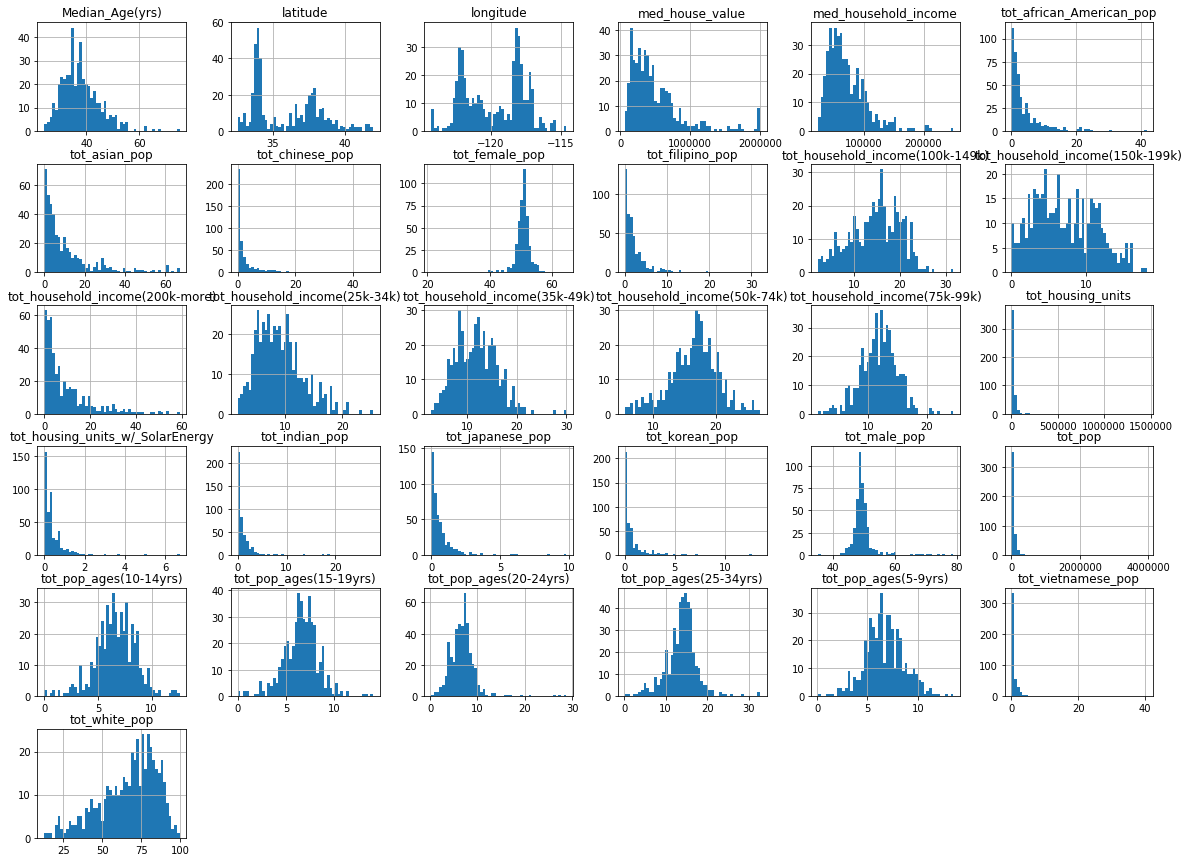

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
df_with_coords.hist(bins=50, figsize=(20,15));

## <center>Visualize the Data (Data without coordinates)</center>

In [20]:
df_without_coords.describe()

0      med_house_value  tot_housing_units  tot_housing_units_w/_SolarEnergy  \
count     8.670000e+02       8.670000e+02                        867.000000   
mean      4.724512e+05       1.494072e+04                          0.441984   
std       3.787954e+05       5.807243e+04                          0.699911   
min       1.430000e+04       3.740000e+02                          0.000000   
25%       2.206500e+05       1.947000e+03                          0.000000   
50%       3.683000e+05       4.653000e+03                          0.200000   
75%       5.932500e+05       1.402750e+04                          0.600000   
max       2.000001e+06       1.457762e+06                          6.800000   

0      med_household_income  tot_household_income(25k-34k)  \
count            867.000000                     867.000000   
mean           72630.452134                       8.832987   
std            37047.201367                       4.384154   
min            21071.000000                       0.000000   
25%            46649.000000                       5.650000   
50%            63286.000000                       8.300000   
75%            88214.500000                      11.500000   
max           250001.000000                      30.800000   

0      tot_household_income(35k-49k)  tot_household_income(50k-74k)  \
count                     867.000000                     867.000000   
mean                       11.946251                      16.522953   
std                         4.570767                       4.907163   
min                         0.000000                       0.700000   
25%                         8.500000                      13.800000   
50%                        11.700000                      16.800000   
75%                        15.100000                      19.350000   
max                        32.400000                      42.300000   

0      tot_household_income(75k-99k)  tot_household_income(100k-149k)  \
count                     867.000000                       867.000000   
mean                       11.898270                        14.747174   
std                         3.811019                         6.036905   
min                         1.200000                         0.000000   
25%                         9.500000                        10.300000   
50%                        12.000000                        15.200000   
75%                        14.200000                        19.100000   
max                        26.700000                        37.600000   

0      tot_household_income(150k-199k)  ...  Median_Age(yrs)  tot_white_pop  \
count                       867.000000  ...       867.000000     867.000000   
mean                          7.122837  ...        39.087543      70.044060   
std                           4.544599  ...         8.235121      18.438357   
min                           0.000000  ...        20.500000       9.500000   
25%                           3.400000  ...        33.000000      58.950000   
50%                           6.500000  ...        37.900000      73.700000   
75%                          10.700000  ...        44.550000      85.000000   
max                          21.300000  ...        75.300000      98.700000   

0      tot_african_American_pop  tot_asian_pop  tot_indian_pop  \
count                867.000000     867.000000      867.000000   
mean                   3.704960       9.077047        1.133333   
std                    6.419018      12.105244        2.656050   
min                    0.000000       0.000000        0.000000   
25%                    0.600000       1.500000        0.000000   
50%                    1.600000       4.300000        0.300000   
75%                    4.250000      11.200000        1.100000   
max                   80.600000      67.100000       27.700000   

0      tot_chinese_pop  tot_filipino_pop  tot_japanese_pop  tot_korean_pop  \
count       867.000000        867.000000      

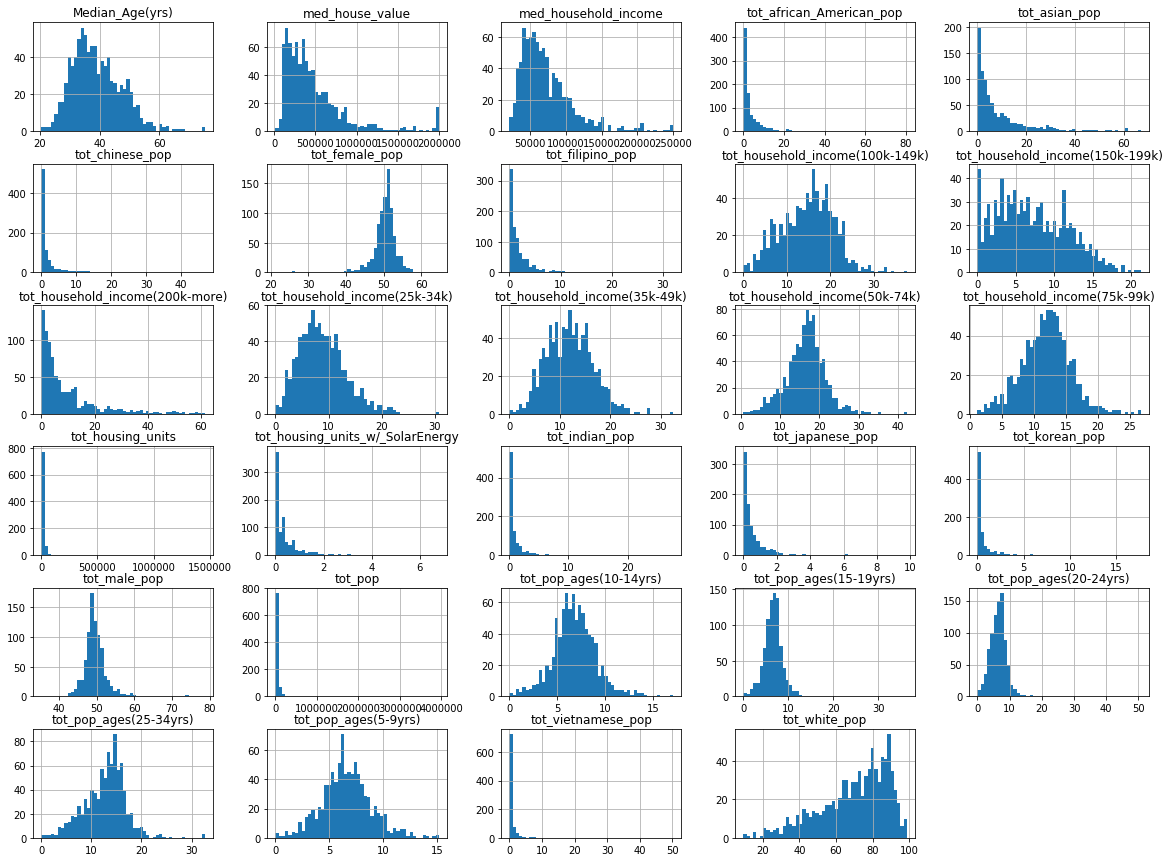

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
df_without_coords.hist(bins=50, figsize=(20,15));

# <center>Closer Look at Median Household Income (Dataframe with Coordinates)</center>
### Analysis of Median Household Income
**Boxplot** 
- Box is short, implies data points are similar
- Median value is closer to the bottom, most of the data has lower values
- One side of the box has long whiskers but not the other, data may be highly varying onlying in one direction

**Histogram**
- Tail Heavy - will need to break down this attribute into categories for stratified sampling


In [22]:
df_with_coords['med_household_income'].describe()

count       457.000000
mean      71583.669584
std       33540.903471
min       22802.000000
25%       48117.000000
50%       63286.000000
75%       87532.000000
max      250001.000000
Name: med_household_income, dtype: float64

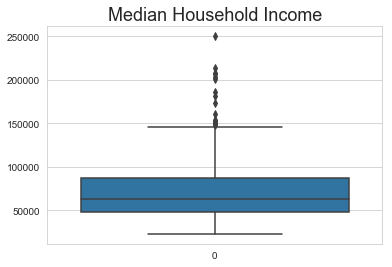

In [23]:
import seaborn as sns
sns.set_style("whitegrid",{'axes.grid': True})
sns.boxplot(data=df_with_coords['med_household_income']).set_title('Median Household Income',fontsize=18);

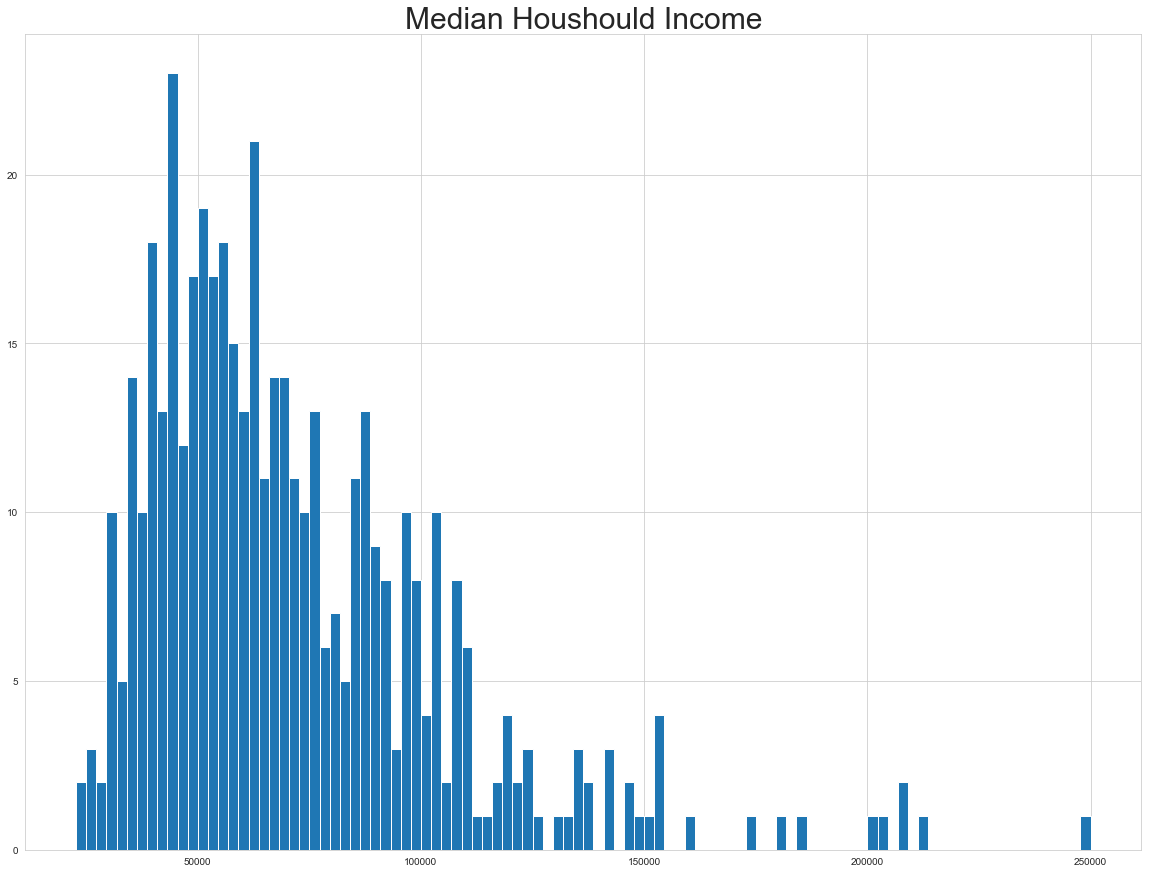

In [24]:
bins_list = []
for x in range(1,13):
    bins_list.append(x*20000)
df_with_coords['med_household_income'].hist(bins=100,figsize=(20,15));
plt.title('Median Houshould Income',fontsize=30);

# <center>Closer Look at Median Household Income (Dataframe without Coordinates)</center>
### Analysis of Median Household Income
**Boxplot** 
- Box is short, implies data points are similar
- Median value is closer to the bottom, most of the data has lower values
- One side of the box has long whiskers but not the other, data may be highly varying onlying in one direction

**Histogram**
- Tail Heavy - will need to break down this attribute into categories for stratified sampling

In [25]:
df_without_coords['med_household_income'].describe()

count       867.000000
mean      72630.452134
std       37047.201367
min       21071.000000
25%       46649.000000
50%       63286.000000
75%       88214.500000
max      250001.000000
Name: med_household_income, dtype: float64

In [26]:
#sns.boxplot(data=df_without_coords['med_household_Income']).set_title('Median Household Income',fontsize=18)
df_without_coords.head()

0          city  med_house_value  tot_housing_units  \
0         acton         497700.0               2869   
1      adelanto         151600.0               8751   
2  agoura hills         745000.0               7674   
3    agua dulce         585500.0               1254   
4      ahwahnee         326000.0                942   

0  tot_housing_units_w/_SolarEnergy  med_household_income  \
0                               0.3               90859.0   
1                               0.2               34446.0   
2                               0.0              116652.0   
3                               2.9              105685.0   
4                               0.0               66008.0   

0  tot_household_income(25k-34k)  tot_household_income(35k-49k)  \
0                            6.9                            8.0   
1                           13.7                           14.6   
2                            2.8                            5.2   
3                            6.3                            3.5   
4                            2.8                           12.7   

0  tot_household_income(50k-74k)  tot_household_income(75k-99k)  \
0                           15.5                           15.8   
1                           17.6                            8.5   
2                           15.0                           10.7   
3                           19.4                            4.2   
4                           42.3                            6.6   

0  tot_household_income(100k-149k)  ...  Median_Age(yrs)  tot_white_pop  \
0                             18.2  ...             50.2           88.0   
1                              6.3  ...             27.5           61.3   
2                             19.1  ...             44.0           82.2   
3                             19.5  ...             47.3           89.7   
4                             12.3  ...             60.0           98.7   

0  tot_african_American_pop  tot_asian_pop  tot_indian_pop  tot_chinese_pop  \
0                       1.4            1.1             0.7              0.0   
1                      21.5            1.5             0.0              0.0   
2                       2.6            8.8             1.4              3.2   
3                       0.4            1.5             0.0              0.0   
4                       0.0            0.0             0.0              0.0   

0  tot_filipino_pop  tot_japanese_pop  tot_korean_pop  tot_vietnamese_pop  
0               0.1               0.2             0.0                 0.0  
1               0.7               0.0             0.1                 0.1  
2               1.4               1.3             0.7                 0.0  
3               0.0               0.0             0.0                 0.0  
4               0.0               0.0             0.0                 0.0  

[5 rows x 30 columns]

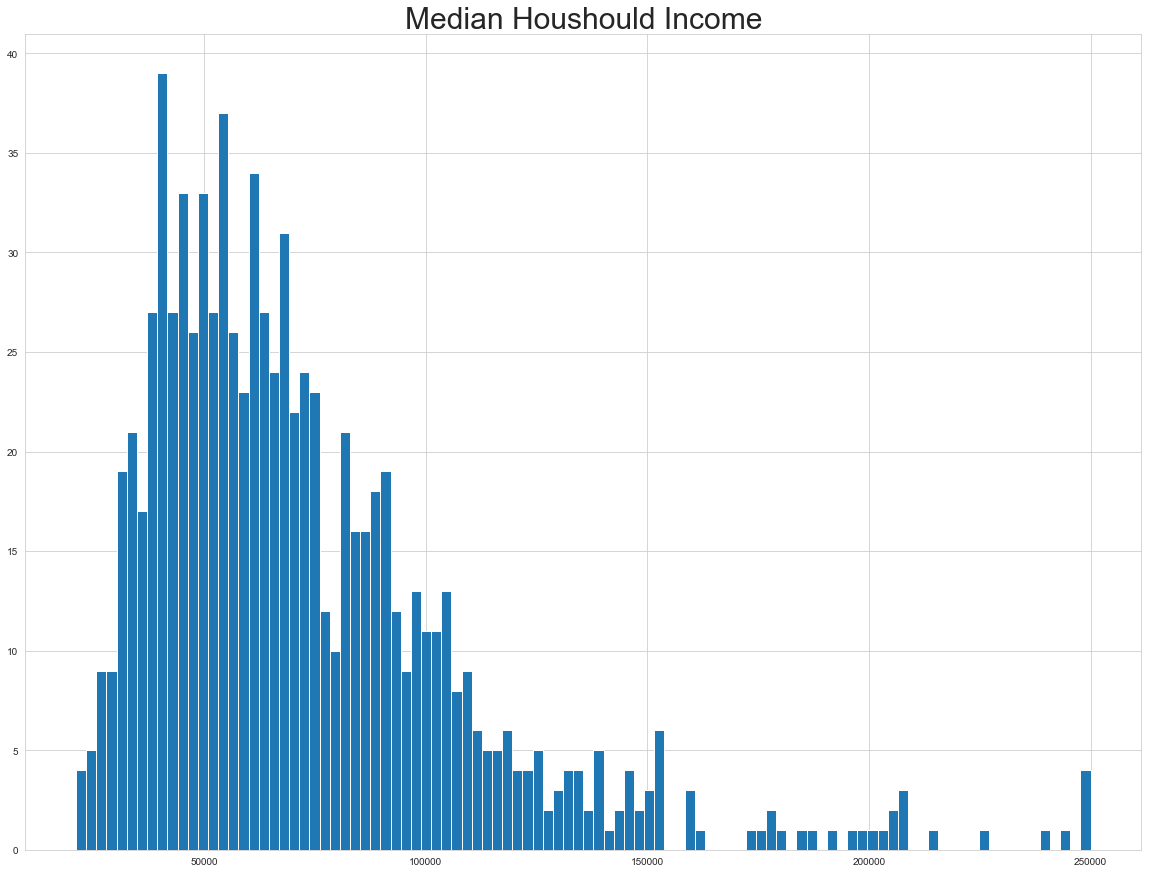

In [27]:
bins_list = []
for x in range(1,13):
    bins_list.append(x*20000)
df_without_coords['med_household_income'].hist(bins=100,figsize=(20,15));
plt.title('Median Houshould Income',fontsize=30);

# <center>Create Test Set</center>

### Create Test Set w/ Random Sampling

In [28]:
from sklearn.model_selection import train_test_split

# df with coordinates
train_set, test_set = train_test_split(df_with_coords, test_size=0.2, random_state=42)
# df without coordinates
train_set_woc, test_set_woc = train_test_split(df_without_coords, test_size=0.2, random_state=42)

### Create Test Set w/ Stratified Sampling 
Create Income Category Attribute

#### Histogram of Income Category (df with coords)

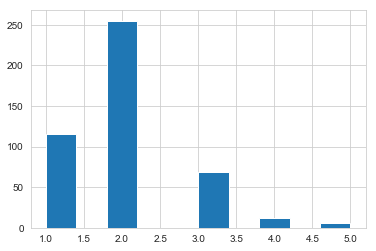

In [29]:
# df with coords
df_with_coords['income_category'] = np.ceil(df_with_coords['med_household_income'] / 48117)
df_with_coords['income_category'].where(df_with_coords['income_category'] < 5, 5.0, inplace=True)
df_with_coords['income_category'].hist();

#### Histogram of Income Category (df without coords)

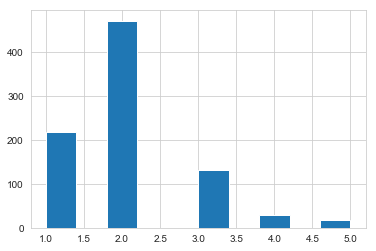

In [30]:
# df without coords
df_without_coords['income_category'] = np.ceil(df_without_coords['med_household_income'] / 46649)
df_without_coords['income_category'].where(df_without_coords['income_category'] < 5, 5.0, inplace=True)
df_without_coords['income_category'].hist();

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

# df with coords
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df_with_coords, df_with_coords["income_category"]):
    strat_train_set = df_with_coords.loc[train_index]
    strat_test_set = df_with_coords.loc[test_index]
    


In [32]:
# df without coords
split_woc = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_woc.split(df_without_coords, df_without_coords["income_category"]):
    strat_train_set_woc = df_without_coords.loc[train_index]
    strat_test_set_woc = df_without_coords.loc[test_index]

In [33]:
# df with coords
strat_test_set['income_category'].value_counts() / len(strat_test_set)

2.0    0.554348
1.0    0.250000
3.0    0.152174
4.0    0.032609
5.0    0.010870
Name: income_category, dtype: float64

In [34]:
# df without coords
strat_test_set_woc['income_category'].value_counts() / len(strat_test_set_woc)

2.0    0.540230
1.0    0.252874
3.0    0.149425
4.0    0.034483
5.0    0.022989
Name: income_category, dtype: float64

### Return Data back to it's Original form (remove 'income_category')

In [35]:
#df with coords
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

# df without coords
for set_ in (strat_train_set_woc, strat_test_set_woc):
    set_.drop("income_category", axis=1, inplace=True)

# <center>Visualize Graphical Data</center>
### Analysis of Graphical Data:
**Notes: Because I had to remove so many cities, the map isn't as defined as I would like it to be**

- There's larger populations in specific parts of southern california and northern california (LA and SF)
- Those areas show that signficant increase in house value for higher populated areas. 

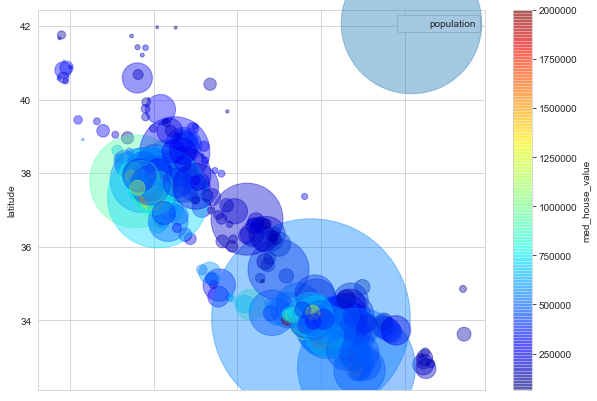

In [36]:
housing = strat_train_set.copy()
housing_woc = strat_train_set_woc.copy()
housing.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4,
            s=housing['tot_pop']/100, label='population', figsize=(10,7),
            c='med_house_value',cmap=plt.get_cmap('jet'), colorbar=True
            );
plt.legend();

# <center>Look for Correlations</center>

### Analysis of Correlations (Df with Coordinates)
Using the corr() method I determined the standard correlation coefficient between every pair of attribute
**Note: Coreelation coefficient only measures linear correlations and might miss nonlinear relationships**
- The attributes that have a strong correlation to the median house value are:
POSITIVE CORRELATION
1. median household income
2. total household income (200k or more)
3. Median age (yrs)
4. Total Chinese Population
5. Total Indian Population
NEGATIVE CORRELATION
1. Latitude

Based off the scatter plots, only median household income has a strong and clear positive linear correlation.

In [37]:
corr_matrix = housing.corr()

In [38]:
corr_matrix['med_house_value'].sort_values(ascending=False)

med_house_value                     1.000000
tot_household_income(200k-more)     0.919973
med_household_income                0.870058
tot_household_income(150k-199k)     0.633384
Median_Age(yrs)                     0.483107
tot_japanese_pop                    0.418663
tot_chinese_pop                     0.408361
tot_asian_pop                       0.399194
tot_household_income(100k-149k)     0.333192
tot_korean_pop                      0.329727
tot_indian_pop                      0.302038
tot_female_pop                      0.176434
tot_vietnamese_pop                  0.068576
tot_filipino_pop                    0.043625
tot_housing_units                   0.029896
tot_housing_units_w/_SolarEnergy    0.017225
tot_pop                             0.015482
longitude                          -0.016459
tot_white_pop                      -0.030086
tot_pop_ages(10-14yrs)             -0.131854
tot_male_pop                       -0.176434
tot_african_American_pop           -0.179903
latitude  

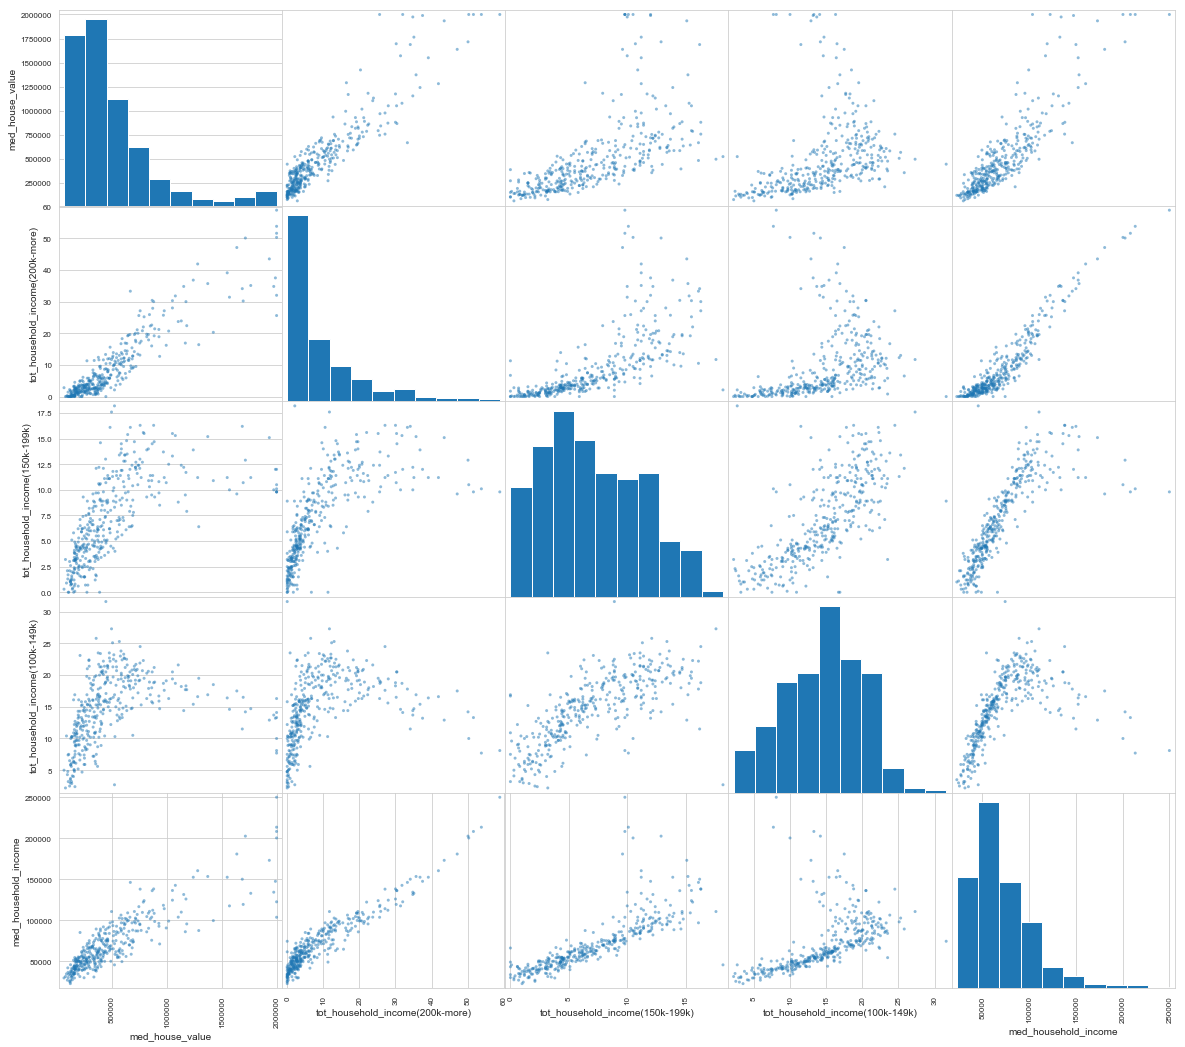

In [39]:
from pandas.plotting import scatter_matrix

attributes_hi_1 = ['med_house_value', 'tot_household_income(200k-more)','tot_household_income(150k-199k)',
                'tot_household_income(100k-149k)','med_household_income']

scatter_matrix(housing[attributes_hi_1], figsize=(20,18));
#plt.tight_layout()
plt.grid(True)

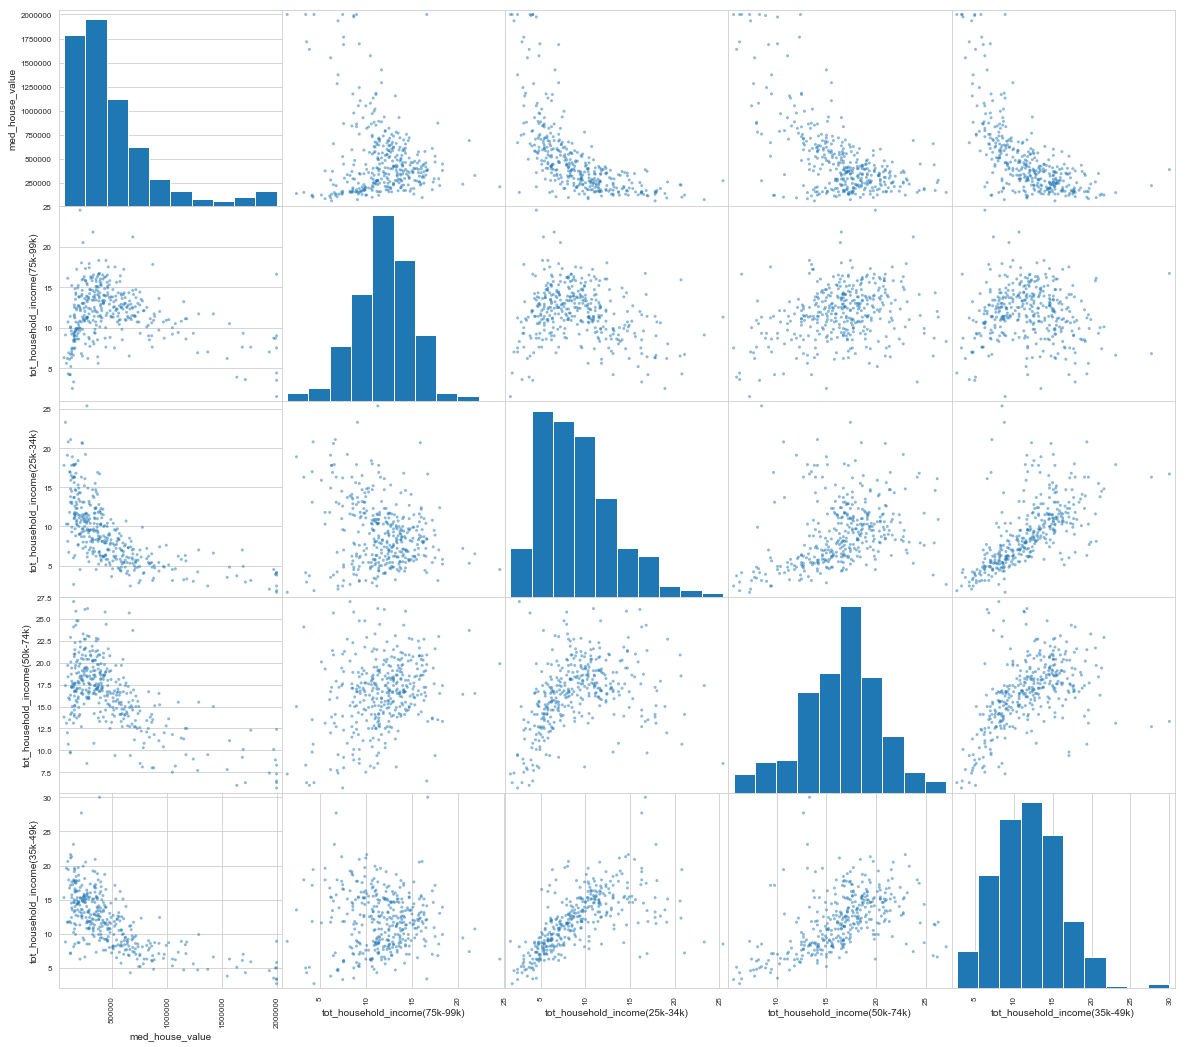

In [40]:
# lower half of house hold income
attributes_hi_2 = ['med_house_value', 'tot_household_income(75k-99k)','tot_household_income(25k-34k)',
                   'tot_household_income(50k-74k)','tot_household_income(35k-49k)']

scatter_matrix(housing[attributes_hi_2], figsize=(20,18));
#plt.tight_layout()
plt.grid(True)

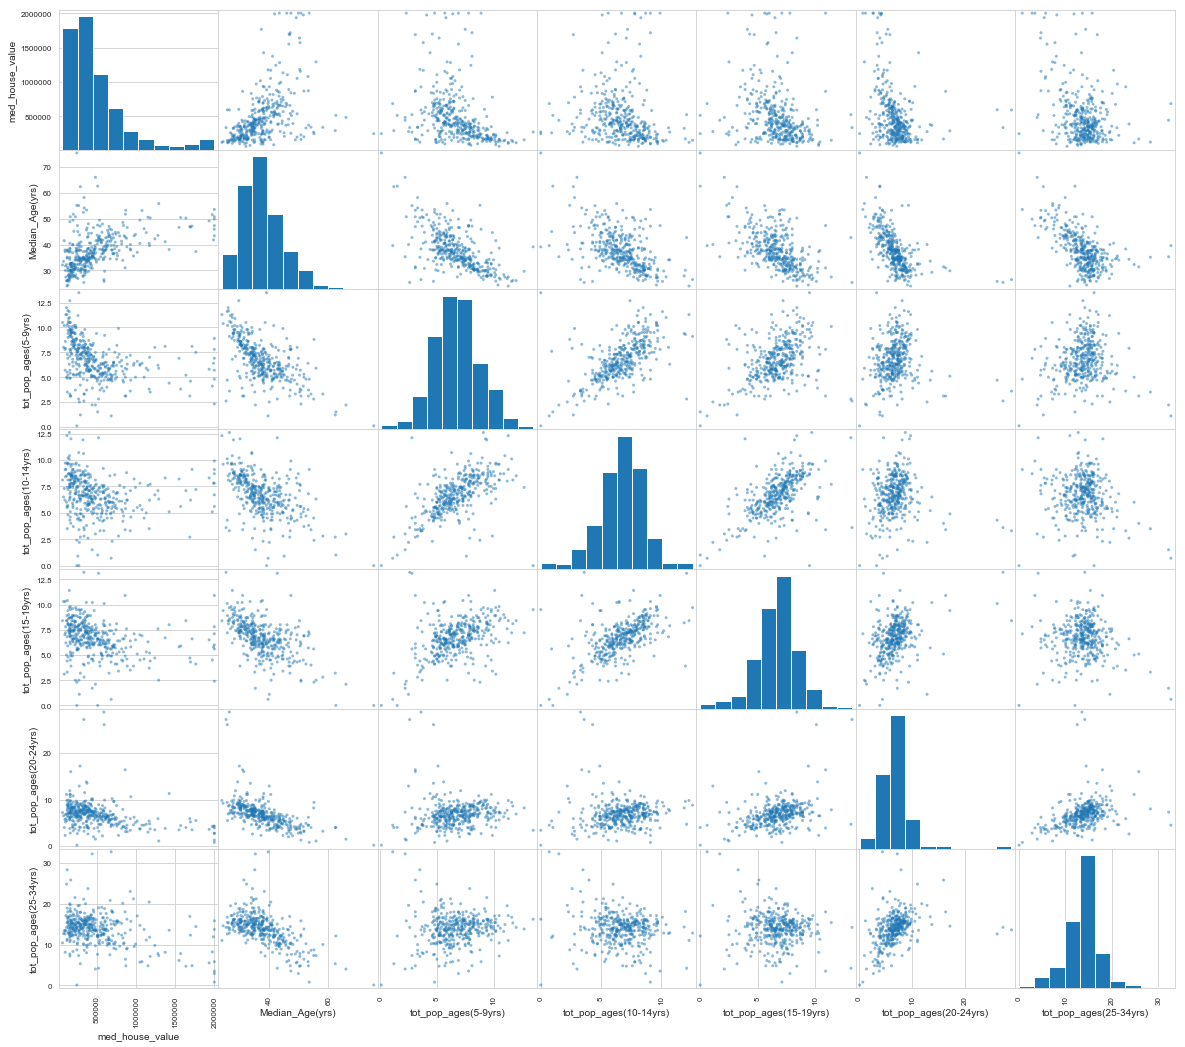

In [41]:
# Compare high correlated age populations
attributes_age = ['med_house_value', 'Median_Age(yrs)','tot_pop_ages(5-9yrs)','tot_pop_ages(10-14yrs)',
                  'tot_pop_ages(15-19yrs)','tot_pop_ages(20-24yrs)', 'tot_pop_ages(25-34yrs)']

scatter_matrix(housing[attributes_age], figsize=(20,18));
#plt.tight_layout()
plt.grid(True)

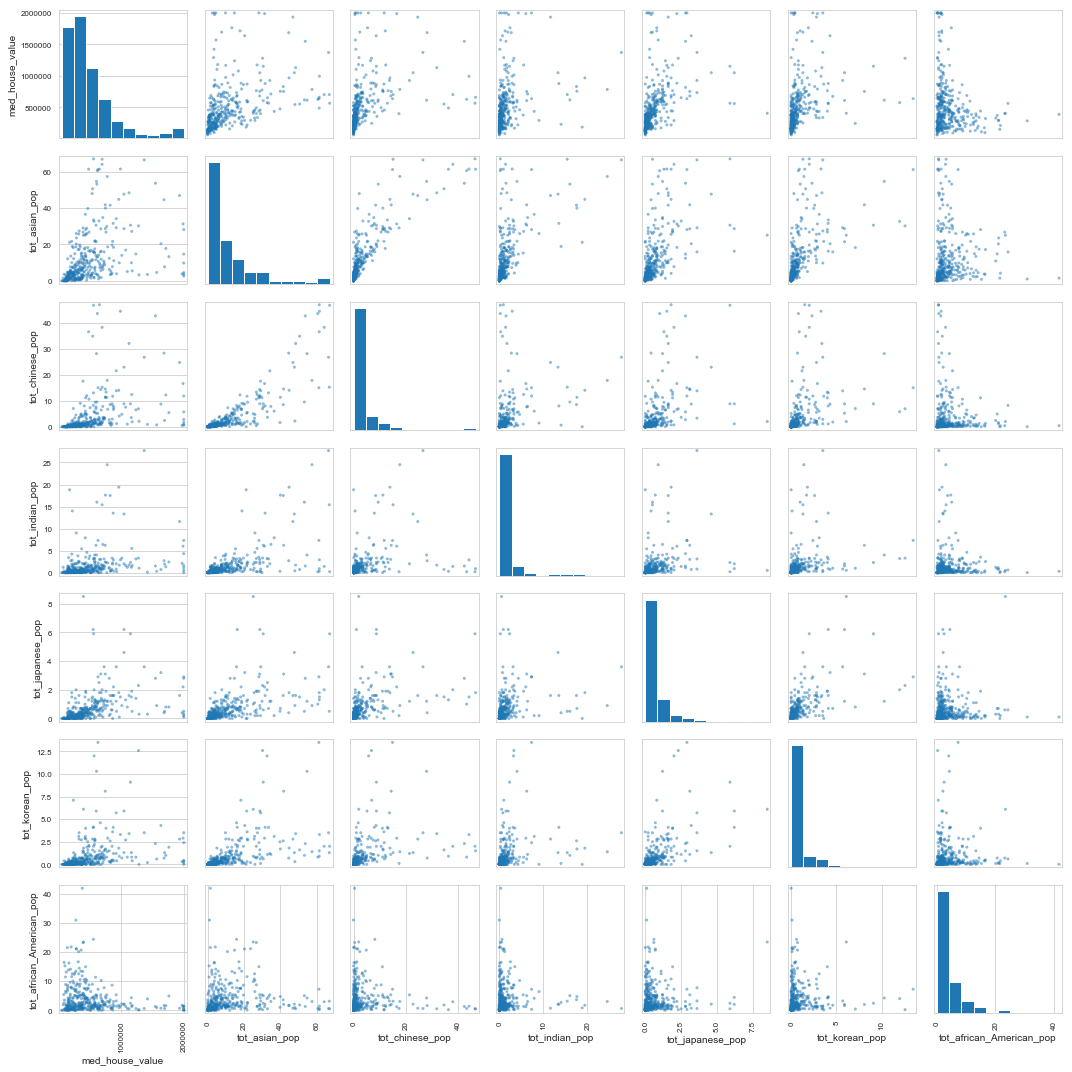

In [42]:
# Compare high correlated ethnicity populations
attributes_eth = ['med_house_value','tot_asian_pop','tot_chinese_pop', 'tot_indian_pop',
                'tot_japanese_pop','tot_korean_pop','tot_african_American_pop']
scatter_matrix(housing[attributes_eth],figsize=(15,15));
plt.tight_layout()

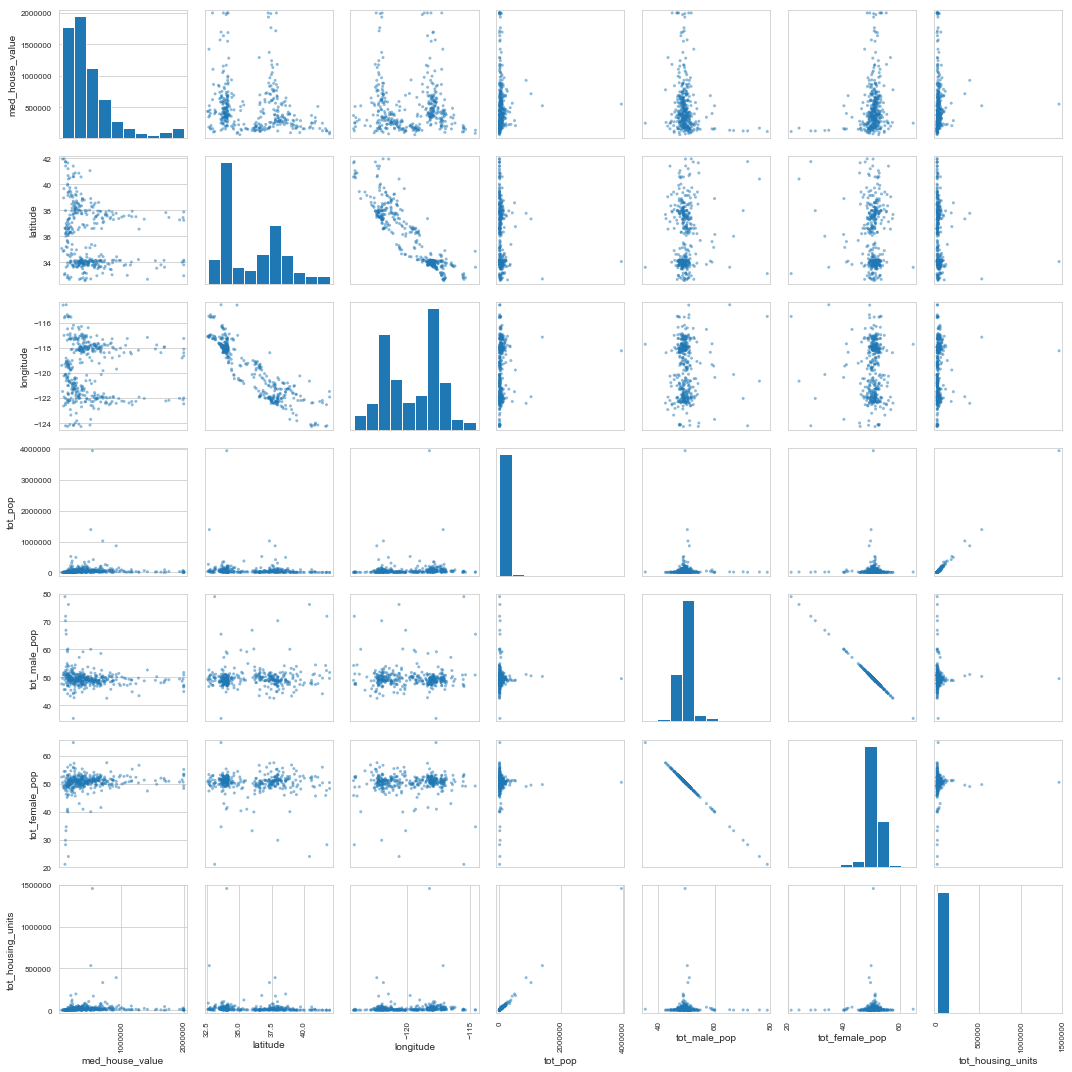

In [43]:
# Rest of populations
attributes_other = ['med_house_value','latitude','longitude','tot_pop','tot_male_pop',
                    'tot_female_pop','tot_housing_units']
scatter_matrix(housing[attributes_other],figsize=(15,15));
plt.tight_layout()

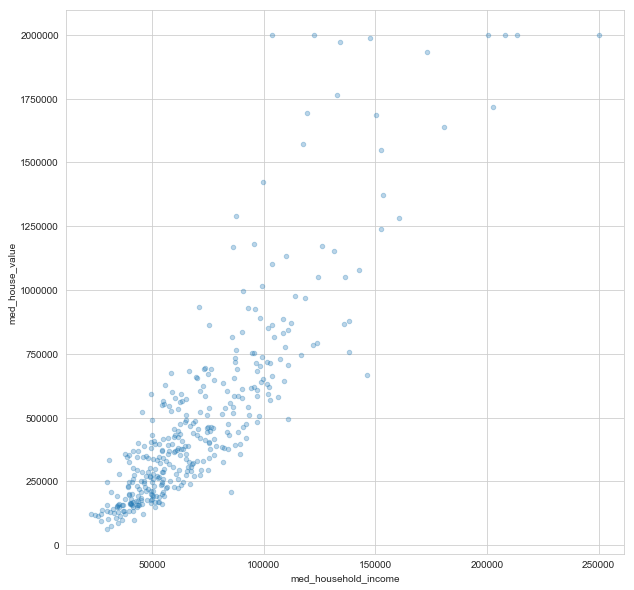

In [44]:
housing.plot(kind='scatter', x='med_household_income', y='med_house_value', alpha=0.3, figsize=(10,10));

### Analysis of Correlations (Df without Coordinates)
Using the corr() method I determined the standard correlation coefficient between every pair of attribute
**Note: Coreelation coefficient only measures linear correlations and might miss nonlinear relationships**
- The attributes that have a strong correlation to the median house value are:
POSITIVE CORRELATION
1. median household income
2. total household income (200k or more)
3. Median age (yrs)
4. Total Chinese Population
5. Total Indian Population
NEGATIVE CORRELATION
1. Latitude

Based off the scatter plots, only median household income has a strong and clear positive linear correlation.

In [45]:
corr_matrix = housing_woc.corr()

In [46]:
corr_matrix['med_house_value'].sort_values(ascending=False)

0
med_house_value                     1.000000
tot_household_income(200k-more)     0.901585
med_household_income                0.862593
tot_household_income(150k-199k)     0.607705
tot_japanese_pop                    0.415069
Median_Age(yrs)                     0.408693
tot_chinese_pop                     0.376861
tot_asian_pop                       0.352541
tot_household_income(100k-149k)     0.311913
tot_indian_pop                      0.296094
tot_korean_pop                      0.291635
tot_female_pop                      0.225906
tot_housing_units_w/_SolarEnergy    0.113687
tot_filipino_pop                    0.061371
tot_vietnamese_pop                  0.060098
tot_white_pop                       0.030843
tot_housing_units                   0.022814
tot_pop                             0.013938
tot_pop_ages(10-14yrs)             -0.066678
tot_pop_ages(15-19yrs)             -0.117597
tot_african_American_pop           -0.130604
tot_household_income(75k-99k)      -0.158287
tot_male

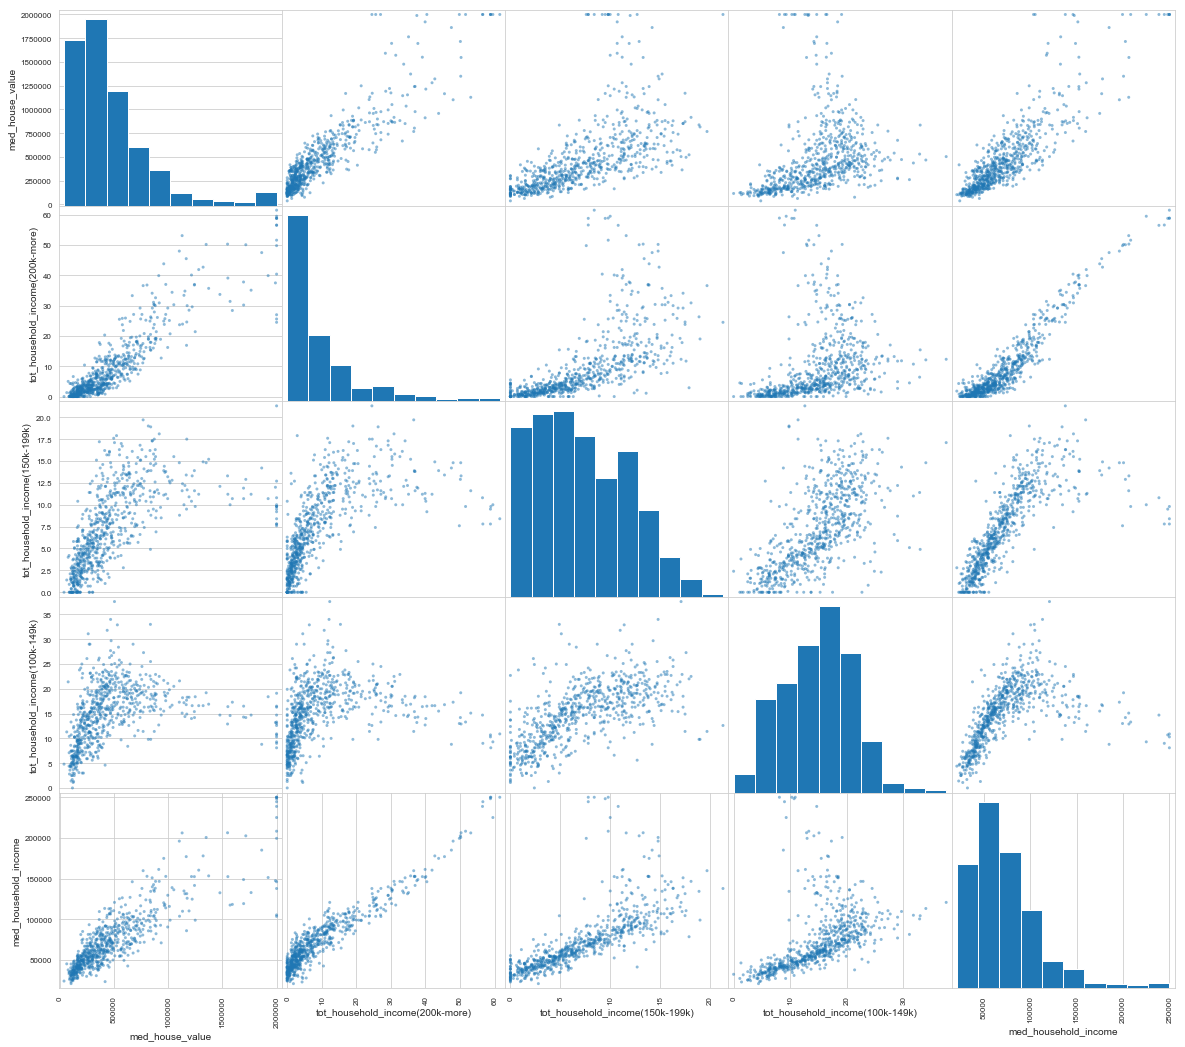

In [47]:
# upper half of household income

attributes_hi_1 = ['med_house_value', 'tot_household_income(200k-more)','tot_household_income(150k-199k)',
                'tot_household_income(100k-149k)','med_household_income']

scatter_matrix(housing_woc[attributes_hi_1], figsize=(20,18));
#plt.tight_layout()
plt.grid(True)

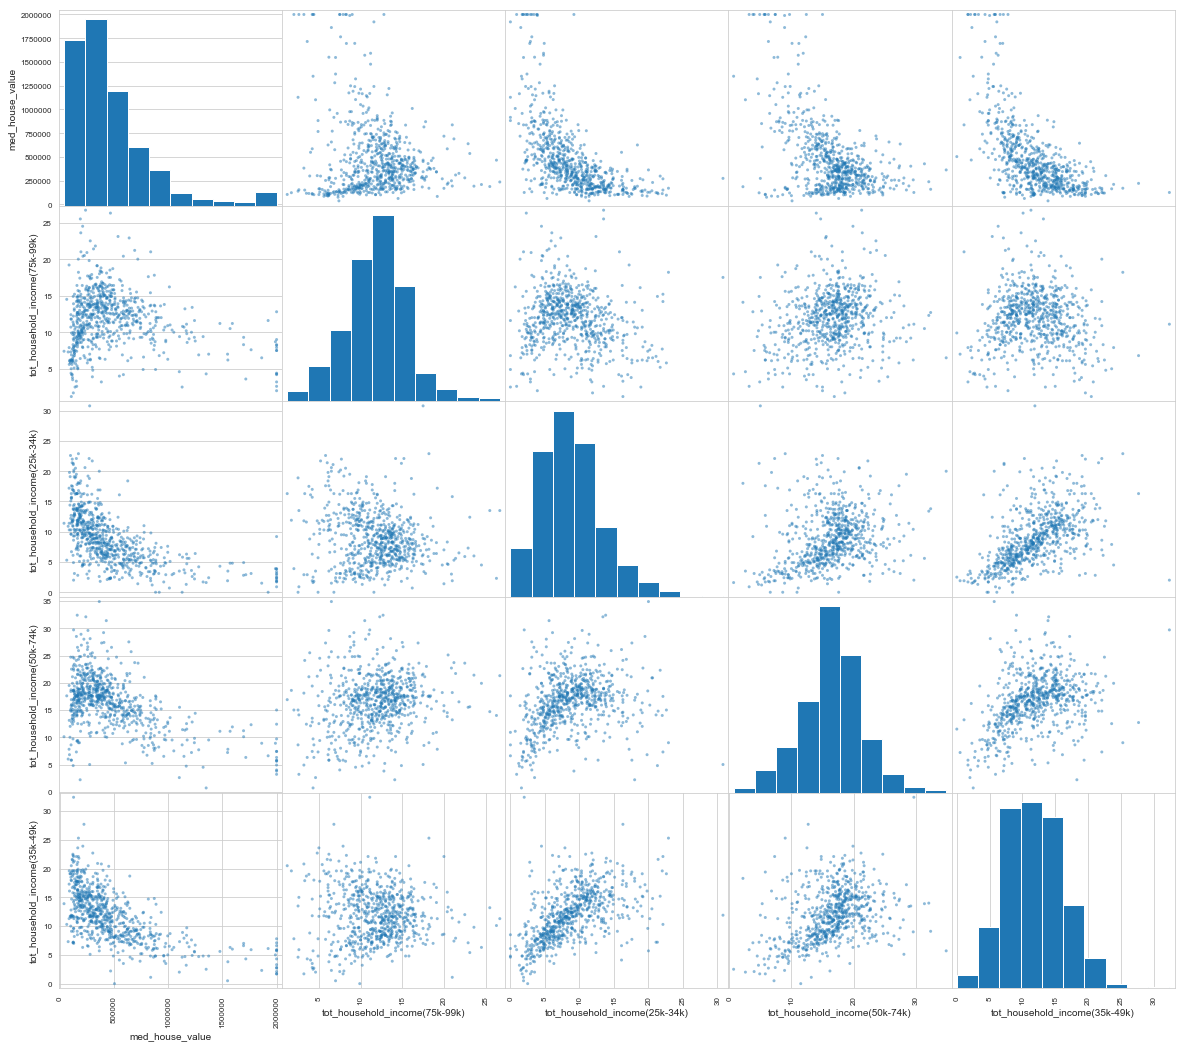

In [48]:
# lower half of house hold income
attributes_hi_2 = ['med_house_value', 'tot_household_income(75k-99k)','tot_household_income(25k-34k)',
                   'tot_household_income(50k-74k)','tot_household_income(35k-49k)']

scatter_matrix(housing_woc[attributes_hi_2], figsize=(20,18));
#plt.tight_layout()
plt.grid(True)

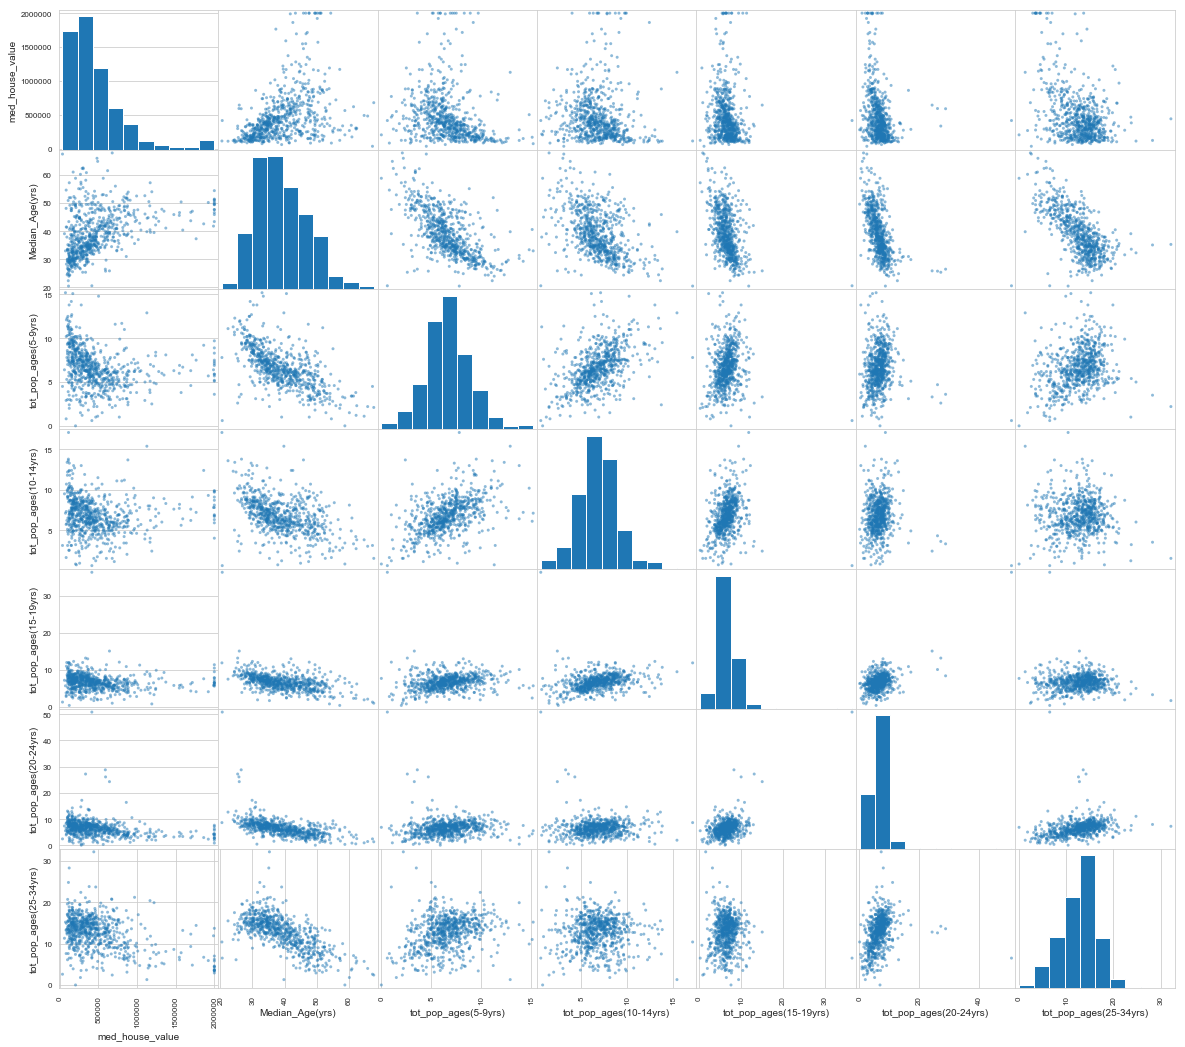

In [49]:
# Compare high correlated age populations
attributes_age = ['med_house_value', 'Median_Age(yrs)','tot_pop_ages(5-9yrs)','tot_pop_ages(10-14yrs)',
                  'tot_pop_ages(15-19yrs)','tot_pop_ages(20-24yrs)', 'tot_pop_ages(25-34yrs)']

scatter_matrix(housing_woc[attributes_age], figsize=(20,18));
#plt.tight_layout()
plt.grid(True)

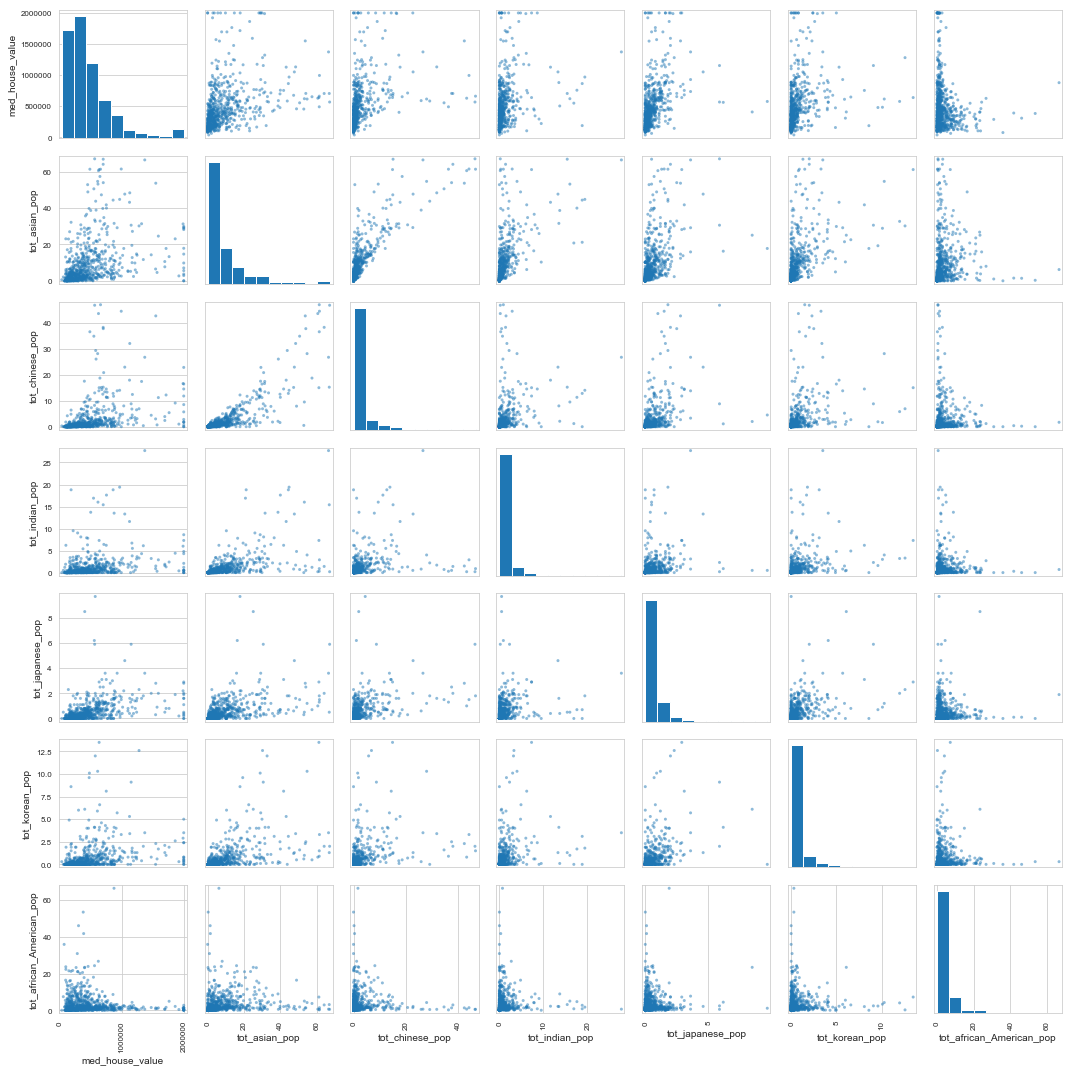

In [50]:
# Compare high correlated ethnicity populations
attributes_eth = ['med_house_value','tot_asian_pop','tot_chinese_pop', 'tot_indian_pop',
                'tot_japanese_pop','tot_korean_pop','tot_african_American_pop']
scatter_matrix(housing_woc[attributes_eth],figsize=(15,15));
plt.tight_layout()

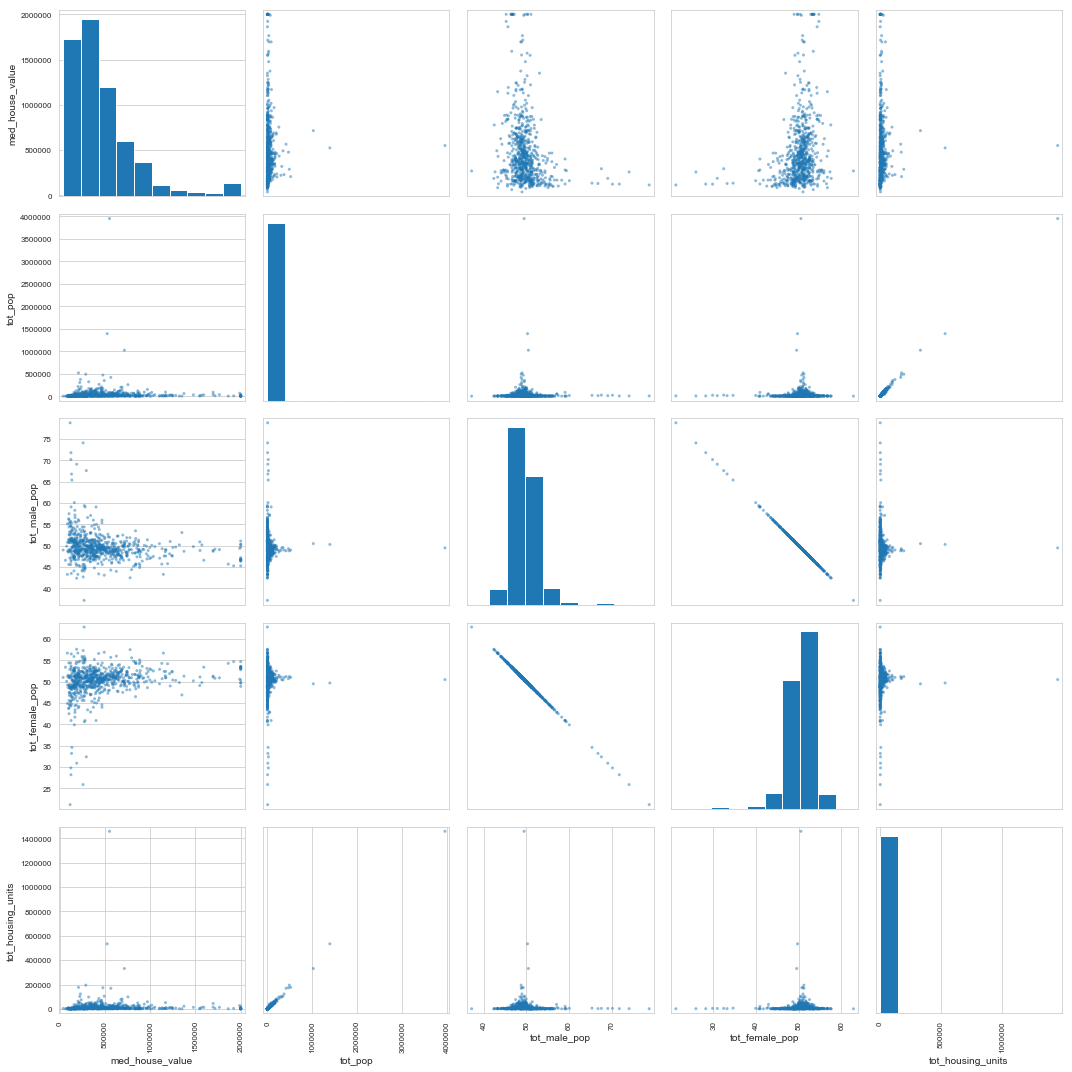

In [51]:
# Rest of populations
attributes_other = ['med_house_value','tot_pop','tot_male_pop','tot_female_pop','tot_housing_units']
scatter_matrix(housing_woc[attributes_other],figsize=(15,15));
plt.tight_layout()

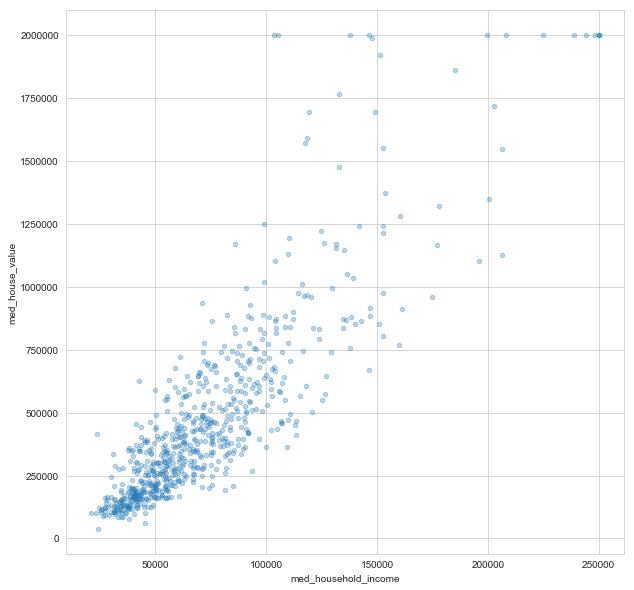

In [52]:
housing_woc.plot(kind='scatter', x='med_household_income', y='med_house_value', alpha=0.3, figsize=(10,10));

# <center>Prepare Data for Machine Learning Algorithms</center>
### Data Cleaning
- There are no missing values, after the data extraction process
- The duplicate cities were replaced already, after the data extraction process

### Feature Scaling
- standardization scaling was done instead of normalization because standardization is much less affected by outliers

### Custom Transformations
- No transformations were conducted

In [53]:
## df with coordinates
housing = strat_train_set.drop('med_house_value', axis=1)
housing_labels = strat_train_set['med_house_value'].copy()

## df without coordinates
housing_woc = strat_train_set_woc.drop('med_house_value', axis=1)
housing_labels_woc = strat_train_set_woc['med_house_value'].copy()

#### DataFrame Selector
transofroms the data in a dataframe by selecting desired attributes, dorpping the rest, and converting the resulting DataFrame to a NumPy array. This helps for writing a pipeline that takes a Pandas DataFrame and handles only the numberical values

In [54]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        #return X[self.attribute_names].values
        return X[self.attribute_names].to_numpy()
## dataframe with coordinates 
housing_num = housing.drop("city", axis=1)
num_attributes = list(housing_num)

## dataframe without coordinates
housing_num_woc = housing_woc.drop("city", axis=1)
num_attributes_woc = list(housing_num_woc)

In [55]:
# Transformation Pipelines
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Dataframe with coordinates
num_pipeline = Pipeline([
    # selects num attributes only 
    ('selector', DataFrameSelector(num_attributes) ),
    # Feature Scaling
    ('std_scaler', StandardScaler() )
])

# use this to train
housing_prepared = num_pipeline.fit_transform(housing)
print("w/ coordinates: ",housing_prepared.shape)

## Dataframe without coordinates
num_pipeline_woc = Pipeline([
    # selects num attributes only 
    ('selector', DataFrameSelector(num_attributes_woc) ),
    # Feature Scaling
    ('std_scaler', StandardScaler() )
])
# use this to train
housing_prepared_woc = num_pipeline_woc.fit_transform(housing_woc)
print("w/ out coordinates",housing_prepared_woc.shape)

w/ coordinates:  (365, 30)
w/ out coordinates (693, 28)


## <center>Select a Model</center>
##### Results:
Using the RMSE as a performance measure we implemneted cross validation with 10 iterations and determined the mean. 
##### 1) Linear Regression
    - With Coordinates: 141622.5369323622
    - Without Coordinates: 149313.12103846672
##### 2) Decision Tree
    - With Coordinates: 189401.260902898
    - Without Coordinates: 188194.8595626597
##### 3) Random Forest
    - With Coordinates: 143801.30115214203
    - Without Coordinates: 152272.2260743542
    
##### Analysis:
Linear Regression and Random Forest were the best performing models when using the set with longitude and latitude coordinates. I will now train a linear regression model and random forest model on the test set with coordinates

In [56]:
# function to display scores
def display_scores(scores):
    score_list = []
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    score_list.append(scores.mean())
    print("Standard Deviations: ", scores.std())
    score_list.append(scores.std())
    #return scores.mean()
    return score_list
    
# function to evaluate accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100* np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

### Linear Regression

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

## w/ coordinates
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print("RMSE of Linear Regression Model(w/ coordinates): ", lin_rmse)
base_lin_accuracy = evaluate(lin_reg, housing_prepared, housing_labels)

## without coordinates
lin_reg_woc = LinearRegression()
lin_reg_woc.fit(housing_prepared_woc, housing_labels_woc)
housing_predictions_woc = lin_reg_woc.predict(housing_prepared_woc)
lin_mse_woc = mean_squared_error(housing_labels_woc, housing_predictions_woc)
lin_rmse_woc = np.sqrt(lin_mse_woc)
print("\nRMSE of Linear Regression Model(w/out coordinates): ", lin_rmse_woc)
base_lin_woc_accuracy = evaluate(lin_reg_woc, housing_prepared_woc,housing_labels_woc)

RMSE of Linear Regression Model(w/ coordinates):  130215.15904931337
Model Performance
Average Error: 83373.4276 degrees.
Accuracy = 77.23%.

RMSE of Linear Regression Model(w/out coordinates):  145098.44117481104
Model Performance
Average Error: 92845.5762 degrees.
Accuracy = 75.29%.


#### Evaluate Linear Regression Model w/ Cross-Validation

In [58]:
## w/ coordinates
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
print("With Coordinates")
lin_rmse_mean = display_scores(lin_rmse_scores)



## without coordinates
lin_scores_woc = cross_val_score(lin_reg_woc, housing_prepared_woc, housing_labels_woc, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_woc = np.sqrt(-lin_scores_woc)
print("\nWithout Coordinates")
lin_rmse_mean_woc = display_scores(lin_rmse_scores_woc)


With Coordinates
Scores:  [142472.96114095 119301.56055054 113091.41073316 199135.67690608
 151198.53280768  98322.09632204 143734.68938576 174241.06772931
 144839.14861971 129888.2251284 ]
Mean:  141622.5369323622
Standard Deviations:  27935.343021794717

Without Coordinates
Scores:  [192079.26705747 197819.74711354 121318.71687015 134724.28834884
 164082.5143741  116893.03365981 160504.67942067 135658.94463876
 166259.97133622 103790.04756511]
Mean:  149313.12103846672
Standard Deviations:  30197.329738380722


### Decision Tree

In [59]:
from sklearn.tree import DecisionTreeRegressor

# with coordinates
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
print("RMSE of Decision Tree Model(with coordinates): ", tree_rmse)
evaluate(tree_reg,housing_prepared,housing_labels)

# without coordinates
tree_reg_woc = DecisionTreeRegressor()
tree_reg_woc.fit(housing_prepared_woc, housing_labels_woc)

housing_predictions_woc = tree_reg_woc.predict(housing_prepared_woc)
tree_mse_woc = mean_squared_error(housing_labels_woc, housing_predictions_woc)
tree_rmse_woc = np.sqrt(tree_mse_woc)
print("RMSE of Decision Tree Model(without coordiantes): ", tree_rmse_woc)
evaluate(tree_reg_woc,housing_prepared_woc, housing_labels_woc)

RMSE of Decision Tree Model(with coordinates):  0.0
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
RMSE of Decision Tree Model(without coordiantes):  0.0
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.


100.0

#### Evaluate Decision Tree Model w/ Cross-Validation

In [60]:
## with coordinates
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
print("With Coordinates")
tree_rmse_mean = display_scores(tree_rmse_scores)

# without coordinates
scores_woc = cross_val_score(tree_reg_woc, housing_prepared_woc, housing_labels_woc, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores_woc = np.sqrt(-scores_woc)
print("\nWithout Coordinates")
tree_rmse_mean_woc = display_scores(tree_rmse_scores_woc)


With Coordinates
Scores:  [191764.36624713 140789.03794484 265047.66261847 236732.98935447
 173231.88880024 113884.98218232 270581.09425221 188742.12713529
 208699.76498689 142630.73145559]
Mean:  193210.4644977431
Standard Deviations:  50300.073766203335

Without Coordinates
Scores:  [195364.55586569 242342.23110543 166007.40258882 197736.26447836
 138905.79906718 148019.71519685 235934.87553302 167685.03947511
 165246.14045794 146195.4721835 ]
Mean:  180343.74959519043
Standard Deviations:  34618.01925381262


### Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

# with coordinates
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print("RMSE of Random Forest Model(with coordinates): ", forest_rmse)
base_rf_accuracy = evaluate(forest_reg,housing_prepared, housing_labels)

# without coordinates
forest_reg_woc = RandomForestRegressor()
forest_reg_woc.fit(housing_prepared_woc, housing_labels_woc)

housing_predictions_woc = forest_reg_woc.predict(housing_prepared_woc)
forest_mse_woc = mean_squared_error(housing_labels_woc, housing_predictions_woc)
forest_rmse_woc = np.sqrt(forest_mse_woc)
print("RMSE of Random Forest Model(without coordinates): ", forest_rmse_woc)
base_rf_woc_accuracy = evaluate(forest_reg_woc,housing_prepared_woc, housing_labels_woc)

RMSE of Random Forest Model(with coordinates):  57945.5843812891
Model Performance
Average Error: 36164.4153 degrees.
Accuracy = 91.76%.
RMSE of Random Forest Model(without coordinates):  63726.32838500057
Model Performance
Average Error: 40044.7965 degrees.
Accuracy = 89.77%.


/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#### Evaluate Random Forest Model w/ Cross-Validation

In [62]:
## with coordinates
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print("With Coordinates")
rf_rmse_mean = display_scores(forest_rmse_scores)

## without coordinates
forest_scores_woc = cross_val_score(forest_reg_woc, housing_prepared_woc, housing_labels_woc, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores_woc = np.sqrt(-forest_scores_woc)
print("\nWithout Coordinates")
rf_rmse_mean_woc = display_scores(forest_rmse_scores_woc)

With Coordinates
Scores:  [142255.3843615   92589.51283652 177706.24472194 216621.73732154
 160379.53648363  84481.38296827 182987.05339665 185876.88491774
 170528.47128697 120886.48495548]
Mean:  153431.2693250244
Standard Deviations:  40606.69194412003

Without Coordinates
Scores:  [192211.80096071 189417.32940562 142947.21186571 131643.36326112
 153418.65897086 113440.03698949 165277.44715122 131787.4409048
 169053.32462861 104610.35328872]
Mean:  149380.6967426864
Standard Deviations:  28381.507356241047


## <center>Train Models</center>
## Hyperparameter Tuning
##### Linear Regression:
Tune hyperparameters with Stochastic Gradient Descent
##### Random Forest:
Tune hyperparameters with Grid Search and Random Search


Using the RMSE as a performance measure we implemented cross validation with 10 iterations and determined the mean. 
##### 1) Linear Regression
    - Stochastic Gradient Descent(With Coordinates)
        - RMSE Mean:  12643737609.932163
        - Standard Deviation:  37930763666.06873

##### 2) Random Forest
    - GridSearch(With Coordinates)
        - RMSE Mean: 129765.00109548464
        - Standard Deviation: 36437.14023893132
    - RandomSearch(With Coordinates)
        - RMSE Mean: 134560.0283367640
        - Standard Deviation: 35603.51056983236
    
##### Analysis:
- SGD
    - Performed terribly after tuning the hyperparamters
    - Increaed RMSE by 89277%
- Grid Search
    - Single Iteration Accuracy of 91.52% and improved random forest by -0.26%
    - Decreased RMSE by 15.4%
- Random Search
    - Single Iteration Accuracy of 91.01% and improved random forest by -0.81%
    - Decreased RMSE by 12.3%

#### Results:
Grid Search was the best performing model


### Stochastic Gradient Descent

In [63]:
from sklearn.linear_model import SGDRegressor

In [64]:
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(housing_prepared, housing_labels)
sgd_reg.intercept_, sgd_reg.coef_
#base_lin_accuracy = evaluate(lin_reg, housing_prepared, housing_labels)
sgd_accuracy = evaluate(sgd_reg, housing_prepared, housing_labels)
print('Improved Accuracy by: {:0.2f}%.'.format( 100 * ( sgd_accuracy - base_lin_accuracy ) / base_lin_accuracy))

Model Performance
Average Error: 98722.0714 degrees.
Accuracy = 72.56%.
Improved Accuracy by: -6.05%.


/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [65]:
sgd_scores = cross_val_score(sgd_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
sgd_rmse_scores = np.sqrt(-sgd_scores)
print("With Coordinates")
sgd_rmsed_mean = display_scores(sgd_rmse_scores)

With Coordinates
Scores:  [1.39080791e+05 1.20090163e+05 1.11953318e+05 1.99721333e+05
 1.85660556e+05 1.00234567e+05 1.44437461e+05 1.89068253e+05
 1.57244782e+05 1.26436029e+11]
Mean:  12643737609.932163
Standard Deviations:  37930763666.06873


/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/anaconda3/envs/snowflak

### GridSearchCV

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [67]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[3,6,9,12,15,18,21,24,27,30]},
    {'bootstrap':[False], 'n_estimators':[3,10,30], 'max_features':[3,6,9,12,15,18,21,24,27,30]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_
grid_search.best_estimator_
best_grid = grid_search.best_estimator_
rf_grid_accuracy = evaluate(best_grid, housing_prepared, housing_labels)

print('Improved Accuracy by: {:0.2f}%.'.format( 100 * ( rf_grid_accuracy - base_rf_accuracy ) / base_rf_accuracy))

Model Performance
Average Error: 35315.6491 degrees.
Accuracy = 91.52%.
Improved Accuracy by: -0.26%.


In [68]:
gs_scores = cross_val_score(best_grid, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
gs_scores_rmse_scores = np.sqrt(-gs_scores)
print("With Coordinates")
gs_rmse_mean = display_scores(gs_scores_rmse_scores)

With Coordinates
Scores:  [133849.97621326  95410.85538242 116812.63142923 197865.82682895
 124084.19783134  83185.33419618 102034.77483003 182210.72343364
 158930.03998769 103265.65082209]
Mean:  129765.00109548464
Standard Deviations:  36437.14023893132


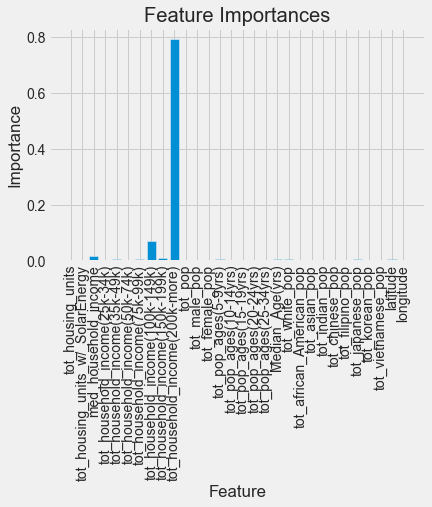

In [69]:
feature_importances = grid_search.best_estimator_.feature_importances_
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(num_attributes)))
# Make a bar chart
plt.bar(x_values, feature_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, num_attributes, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

## Randomized SearchCV


In [70]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num  = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]


rand_grid = {
    'n_estimators': n_estimators,
     'max_features': max_features,
     'max_depth': max_depth,
     'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap
}


rf = RandomForestRegressor()
rand_search = RandomizedSearchCV(estimator = rf, param_distributions = rand_grid, cv=3, verbose=2, random_state=42,
                                 n_jobs=-1)


In [71]:
rand_search.fit(housing_prepared, housing_labels)
#rand_search.best_params_
best_random = rand_search.best_estimator_
rf_random_accuracy = evaluate(best_random, housing_prepared, housing_labels)
print('Improved Accuracy by: {:0.2f}%.'.format( 100 * ( rf_random_accuracy - base_rf_accuracy ) / base_rf_accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.9s finished


Model Performance
Average Error: 37707.4333 degrees.
Accuracy = 91.01%.
Improved Accuracy by: -0.81%.


In [72]:
rs_scores = cross_val_score(best_random, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rs_scores_rmse_scores = np.sqrt(-rs_scores)
print("With Coordinates")
rs_rmse_mean = display_scores(rs_scores_rmse_scores)

With Coordinates
Scores:  [137763.33818001  93112.97890403 132671.53050643 211337.32205596
 133131.04145082  84091.63883248 119423.2690445  173550.10771498
 149156.94322204 111362.11345641]
Mean:  134560.02833676408
Standard Deviations:  35603.51056983236


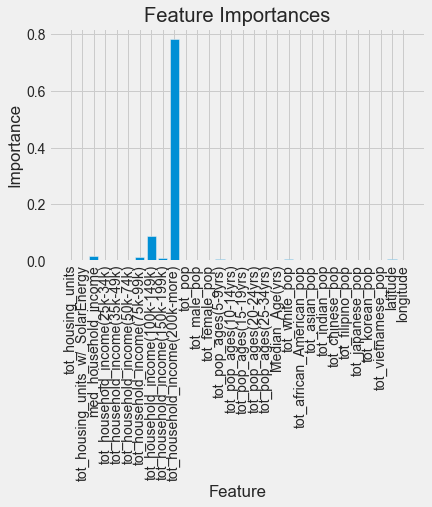

In [73]:
feature_importances = rand_search.best_estimator_.feature_importances_
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(num_attributes)))
# Make a bar chart
plt.bar(x_values, feature_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, num_attributes, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Feature Importances');

## Feature Engineering
#### Drop Less useful features

Removed features that had 0% importance
##### 1) Linear Regression
    - Stochastic Gradient Descent(With Coordinates): 6340466149.785824
##### 2) Random Forest
    - GridSearch(With Coordinates): 137129.83901769604
    - RandomSearch(With Coordinates): 135224.64612574806
    
##### Analysis:
- SGD
    - Performed terribly after tuning the hyperparamters
    - Increaed RMSE by 44,769%
- Grid Search
    - Single Iteration Accuracy of 91.79% and improved random forest by +0.34%
    - Decreased RMSE by 4.64%
- Random Search
    - Single Iteration Accuracy of 90.96% and improved random forest by -0.57%
    - Decreased RMSE by 5.96%

In [74]:
housing_num_fe = housing.drop(["city",'tot_housing_units','tot_housing_units_w/_SolarEnergy','tot_pop','tot_female_pop','tot_male_pop','tot_pop_ages(5-9yrs)',
                            'tot_pop_ages(10-14yrs)','tot_pop_ages(15-19yrs)','tot_pop_ages(20-24yrs)','tot_pop_ages(25-34yrs)','Median_Age(yrs)',
                           'tot_white_pop','tot_asian_pop','tot_chinese_pop','tot_indian_pop','tot_filipino_pop','tot_korean_pop',
                            'tot_african_American_pop','tot_japanese_pop','tot_vietnamese_pop',
                            'tot_household_income(25k-34k)','tot_household_income(35k-49k)','tot_household_income(50k-74k)','longitude','latitude',
                           ], axis=1)
num_attributes = list(housing_num_fe)
housing_prepared_fe = num_pipeline.fit_transform(housing)

### Linear Regression (Feature Extraction)

In [75]:
## Linear Regression
lin_reg_fe = LinearRegression()
lin_reg_fe.fit(housing_prepared_fe, housing_labels)

housing_predictions = lin_reg_fe.predict(housing_prepared_fe)
lin_mse_fe = mean_squared_error(housing_labels, housing_predictions)
lin_rmse_fe = np.sqrt(lin_mse_fe)
print("RMSE of Linear Regression Model: ", lin_rmse_fe)
lin_scores_fe = cross_val_score(lin_reg_fe, housing_prepared_fe, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores_fe = np.sqrt(-lin_scores_fe)

lin_rmse_mean_fe = display_scores(lin_rmse_scores_fe)
base_lin_accuracy_fe = evaluate(lin_reg_fe, housing_prepared_fe, housing_labels)

RMSE of Linear Regression Model:  130215.15904931337
Scores:  [142472.96114095 119301.56055054 113091.41073316 199135.67690608
 151198.53280768  98322.09632204 143734.68938576 174241.06772931
 144839.14861971 129888.2251284 ]
Mean:  141622.5369323622
Standard Deviations:  27935.343021794717
Model Performance
Average Error: 83373.4276 degrees.
Accuracy = 77.23%.


### Decision Tree (Feature Extraction)

In [76]:
## Decision Tree
tree_reg_fe = DecisionTreeRegressor()
tree_reg_fe.fit(housing_prepared_fe, housing_labels)

housing_predictions = tree_reg.predict(housing_prepared_fe)
tree_mse_fe = mean_squared_error(housing_labels, housing_predictions)
tree_rmse_fe = np.sqrt(tree_mse_fe)
print("RMSE of Decision Tree Model: ", tree_rmse_fe)
tree_scores_fe = cross_val_score(tree_reg_fe, housing_prepared_fe, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores_fe = np.sqrt(-tree_scores_fe)

tree_rmse_mean_fe = display_scores(tree_rmse_scores_fe)

RMSE of Decision Tree Model:  0.0
Scores:  [192607.5557722  150037.92480939 285957.22194738 235110.3235804
 165276.58484288 120614.05736204 286378.55329781 184622.07117966
 286854.31951123 273227.18189779]
Mean:  218068.5794200766
Standard Deviations:  60015.807911762975


### Random Forest (Feature Extraction)

In [77]:
# Random Forest
# with coordinates
forest_reg_fe = RandomForestRegressor()
forest_reg_fe.fit(housing_prepared_fe, housing_labels)

housing_predictions = forest_reg_fe.predict(housing_prepared_fe)
forest_mse_fe = mean_squared_error(housing_labels, housing_predictions)
forest_rmse_fe = np.sqrt(forest_mse_fe)
print("RMSE of Random Forest Model: ", forest_rmse_fe)
forest_scores_fe = cross_val_score(forest_reg_fe, housing_prepared_fe, housing_labels, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores_fe = np.sqrt(-forest_scores_fe)

rf_rmse_mean_fe = display_scores(forest_rmse_scores_fe)

RMSE of Random Forest Model:  60003.98511159916


/anaconda3/envs/snowflakes/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Scores:  [151343.83732631  90569.38453431 115375.81531127 202006.1371204
 140637.52622084 105700.80409822 107698.35817977 191186.553438
 147058.91560101 113286.76175799]
Mean:  136486.4093588118
Standard Deviations:  35360.22156889501


### Grid Search (Feature Extraction)

In [78]:
param_grid = [
    {'n_estimators': [3,10,30], 'max_features':[1,2,3,4,5]},
    {'bootstrap':[False], 'n_estimators':[3,10,30], 'max_features':[1,2,3,4,5]}
]

forest_reg_fe = RandomForestRegressor()
grid_search_fe = GridSearchCV(forest_reg_fe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_fe.fit(housing_prepared_fe, housing_labels)

best_grid_fe = grid_search_fe.best_estimator_
rf_grid_accuracy_fe = evaluate(best_grid_fe, housing_prepared_fe, housing_labels)

print('Improved Accuracy by: {:0.2f}%.'.format( 100 * ( rf_grid_accuracy_fe - base_rf_accuracy ) / base_rf_accuracy))

Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improved Accuracy by: 8.98%.


In [79]:
gs_scores_fe = cross_val_score(best_grid_fe, housing_prepared_fe, housing_labels, scoring="neg_mean_squared_error", cv=10)
gs_scores_rmse_scores_fe = np.sqrt(-gs_scores_fe)
print("With Coordinates")
gs_rmse_mean_fe = display_scores(gs_scores_rmse_scores_fe)

With Coordinates
Scores:  [167470.61949786  95325.79563254 149112.5771445  241837.19070536
 148009.61417942  97505.02091242 135701.35725272 201430.22489046
 144401.32145475 149785.7488879 ]
Mean:  153057.9470557935
Standard Deviations:  41564.92832867683


### Randomized Search (Feature Extraction)

In [80]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num  = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10,110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True, False]


rand_grid = {
    'n_estimators': n_estimators,
     'max_features': max_features,
     'max_depth': max_depth,
     'min_samples_split': min_samples_split,
     'min_samples_leaf': min_samples_leaf,
     'bootstrap': bootstrap
}


rf = RandomForestRegressor()
rand_search_fe = RandomizedSearchCV(estimator = rf, param_distributions = rand_grid, cv=3, verbose=2, random_state=42,
                                 n_jobs=-1)


In [81]:
rand_search_fe.fit(housing_prepared_fe, housing_labels)
#rand_search.best_params_
best_random_fe = rand_search_fe.best_estimator_
rf_random_accuracy_fe = evaluate(best_random_fe, housing_prepared_fe, housing_labels)
print('Improved Accuracy by: {:0.2f}%.'.format( 100 * ( rf_random_accuracy_fe - base_rf_accuracy ) / base_rf_accuracy))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   28.5s finished


Model Performance
Average Error: 37912.2803 degrees.
Accuracy = 90.96%.
Improved Accuracy by: -0.87%.


In [82]:
rs_scores_fe = cross_val_score(best_random_fe, housing_prepared_fe, housing_labels, scoring="neg_mean_squared_error", cv=10)
rs_scores_rmse_scores_fe = np.sqrt(-rs_scores_fe)
print("With Coordinates")
rs_rmse_mean_fe = display_scores(rs_scores_rmse_scores_fe)

With Coordinates
Scores:  [138482.33396064  92201.6948286  132949.79217974 213425.98276495
 133576.40601936  85840.71656523 121498.05336484 173923.31389826
 146999.70663009 112277.90868602]
Mean:  135117.5908897723
Standard Deviations:  35741.8473392623


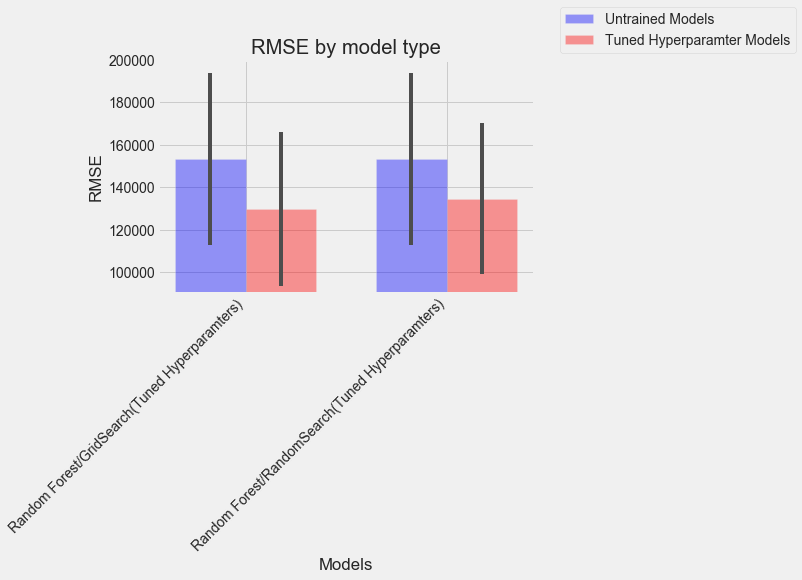

In [92]:

from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = 2

means_initial = (rf_rmse_mean[0],rf_rmse_mean[0])
std_initial = (rf_rmse_mean[1],rf_rmse_mean[1])

means_hp = (gs_rmse_mean[0], rs_rmse_mean[0])
std_hp = (gs_rmse_mean[1], rs_rmse_mean[1])
#means_fe = (gs_rmse_mean_fe, rs_rmse_mean_fe)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_initial, bar_width,
                alpha=opacity, color='b',
                yerr=std_initial, error_kw=error_config,
                label='Untrained Models')


rects2 = ax.bar(index + bar_width, means_hp, bar_width,
                alpha=opacity, color='r',
                yerr=std_hp, error_kw=error_config,
                label='Tuned Hyperparamter Models')


ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by model type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Random Forest/GridSearch(Tuned Hyperparamters)',
                    'Random Forest/RandomSearch(Tuned Hyperparamters)'))
ax.set_ylim([90000, 200000])

ax.legend(bbox_to_anchor=(1.05, 1), loc=3)

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#fig.tight_layout()
plt.show();

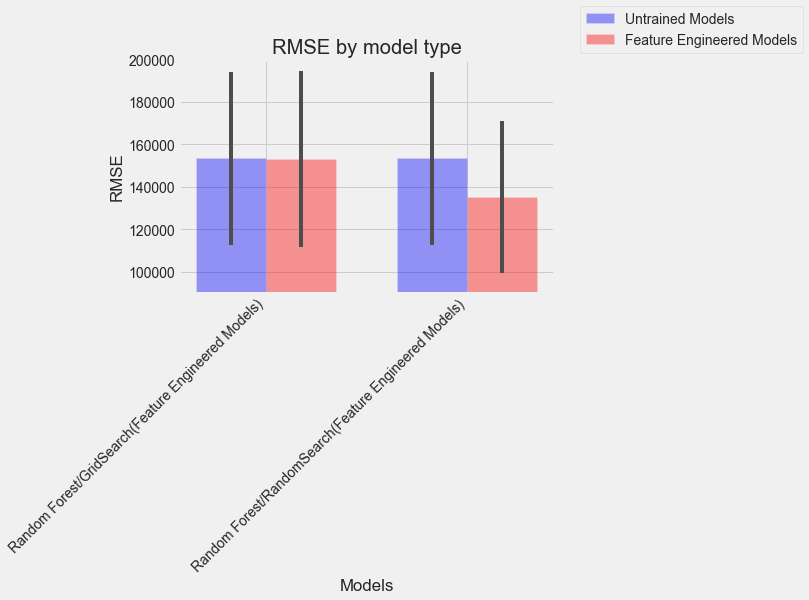

In [91]:

n_groups = 2

means_initial = (rf_rmse_mean[0],rf_rmse_mean[0])
std_initial = (rf_rmse_mean[1],rf_rmse_mean[1])


means_fe = (gs_rmse_mean_fe[0], rs_rmse_mean_fe[0])
std_fe = (gs_rmse_mean_fe[1], rs_rmse_mean_fe[1])


fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_initial, bar_width,
                alpha=opacity, color='b',
                yerr=std_initial, error_kw=error_config,
                label='Untrained Models')


rects2 = ax.bar(index + bar_width, means_fe, bar_width,
                alpha=opacity, color='r',
                yerr=std_fe, error_kw=error_config,
                label='Feature Engineered Models')


ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('RMSE by model type')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Random Forest/GridSearch(Feature Engineered Models)',
                    'Random Forest/RandomSearch(Feature Engineered Models)'))
ax.set_ylim([90000, 200000])

ax.legend(bbox_to_anchor=(1.05, 1), loc=3)

plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
#fig.tight_layout()
plt.show();

# <center>Evaluate Sytem on Test Set</center>
I decided to go with the Random Forest w/ the optimized hyperparamters using Grid Search since it had the lowest RMSE score.
### Results:
The final RMSE was 173621.92240298502 which is 33.8% worse than the RMSE on the training set. This is expected, since there was a lot of hyperparamter tuning done. The system was fine tuned to perform well on the validation data and not unknown data. To fix this I will use a larger data set to prevent overfitting. 

An accurcay rate of 78.2% is okay, but not good enough. I will need to increase the amount of data to optimize the accurcay so my hyperparamter tuning won't cause such a overgeneralization of the test data set.


In [94]:
## best model
final_model = best_grid

X_test = strat_test_set.drop("med_house_value", axis=1)
y_test = strat_test_set["med_house_value"].copy()

In [95]:
X_test_prepared = num_pipeline.transform(X_test)
print("w/ coordinates: ",X_test_prepared.shape)

w/ coordinates:  (92, 30)


In [96]:
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [103]:
print("Final RMSE:")
print(final_rmse)
print("Compared to test RMSE:")
print(((final_rmse - gs_rmse_mean[0])/gs_rmse_mean[0]))

Final RMSE:
173621.92240298502
Compared to test RMSE:
0.33797187945329926


In [101]:
accuracy = evaluate(final_model, X_test_prepared, y_test)

Model Performance
Average Error: 102440.6333 degrees.
Accuracy = 78.20%.
